**Описание перменных:**

*   **tweet** - предложение (твит), которое человек написал в социальной сети X

*   **feeling** - бинарная переменная, равная 1, если твит положительного настроения, и 0, если твит негативного настроения



In [4]:
import pandas as pd

#Читаем файл, разделяем строки по табуляции и задаём имена для столбцов
df = pd.read_csv('~/Desktop/Учеба/5 курс/Годовой проект/EDA, kopchevvo/train_150k.txt', sep='\t', header = None, names = ['feeling', 'tweet'], encoding='utf-8')

## **1) Первичный анализ данных**

In [5]:
df.head()

,feeling,tweet
0,0,Starting back at work today Looks like it'l...
1,1,Sugar levels dropping... munchies setting in. ...
2,1,@karineb22 yeah!!! have a great summer break!
3,1,hannah montana was very good. now going to re...
4,1,"@Mayra326 aww, have fun! I just had my 3D las..."


In [6]:
df.shape

(149985, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149985 entries, 0 to 149984
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   feeling  149985 non-null  int64 
 1   tweet    149985 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [8]:
df.isnull().sum()

feeling    0
tweet      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.sample(10)

,feeling,tweet
111401,1,@MupNorth okay i'm sending it now! and your t...
78659,0,Carlos came over and spent more time with my d...
38639,0,@dearlennon i h8 wesbian. who died on hi? aaaa...
135699,1,Good day yesterday http://twitgoo.com/d3zo
10264,1,@Qilly nopes
70690,0,grade wach geworden und nu regnet's in Stroeme...
34473,1,@GoldyMom With a tweet like that I promptly fo...
104077,0,says i'm sorry! http://plurk.com/p/y2ryu
122039,0,@Kimi_Raikkonen Heard about the break up in F1...
81030,0,"is feeling a bit jack of all trades, master of..."


Набор наблюдений является обучающим (train set). Выборка содержит 149 985 наблюдений, пропущенных значений и дубликатов нет.

Переменная ***feeling*** является категориальной (номинальной, бинарной), тип данных -- int64. Она обозначает два состояния (позитивное и негативное настроение).

Переменная ***tweet*** тоже является категориальной: тип данных -- object. Данная переменная представляет собой категории (каждый твит -- отдельная категория).







## **2) Анализ целевой переменной feeling**

В данной главе сравнивается количество позитивных и негативных твитов. Для лучшего восприятия строятся столбчатая (bar) и круговая (pie) диаграммы.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Количество позитивных и отрицательных твитов
positive_count = df[df['feeling'] == 1].shape[0]
negative_count = df[df['feeling'] == 0].shape[0]

print(f'Количество положительных твитов: {positive_count}')
print(f'Количество отрицательных твитов: {negative_count}')

Количество положительных твитов: 74966
Количество отрицательных твитов: 75019


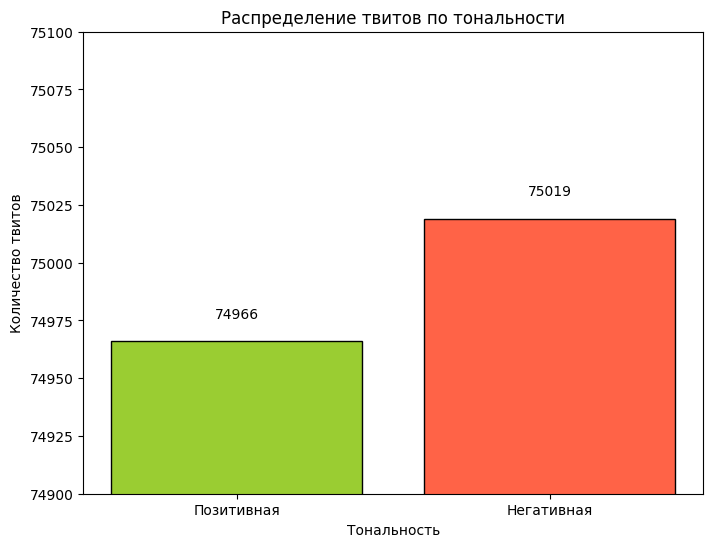

In [13]:
#Столбчатая диаграмма для отображения распределения тональности
plt.figure(figsize=(8, 6))
plt.bar(['Позитивная', 'Негативная'], [positive_count, negative_count], color=['yellowgreen', 'tomato'], edgecolor=['black'])
plt.title('Распределение твитов по тональности')
plt.xlabel('Тональность')
plt.ylabel('Количество твитов')

plt.text(0, positive_count + 10, str(positive_count), ha='center', color='black')
plt.text(1, negative_count + 10, str(negative_count), ha='center', color='black')

plt.ylim(74900, 75100)
plt.show()

In [14]:
#Круговая диаграмма для отображения распределения тональности
unique, count = np.unique(df['feeling'], return_counts=True)
print(unique, count)

[0 1] [75019 74966]


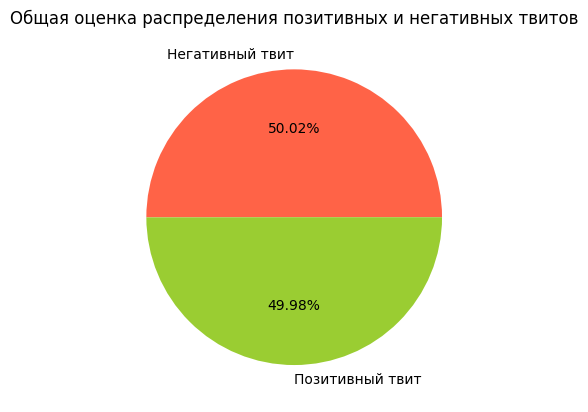

In [15]:
plt.pie(x=count,
        labels=['Негативный твит', 'Позитивный твит'],
        colors=['tomato', 'yellowgreen'],
        autopct='%.2f%%')
plt.title('Общая оценка распределения позитивных и негативных твитов')
plt.show()

Позитивные и негативные твиты встречаются практически с одинаковой периодичностью: количество твитов положительной тональности составляет 74 966 (49,98%) и отрицательной тональности - 75 019 (50,02%).

## **3) Анализ текстовых данных**

В главе 3
1.   проанализировано распределение количества слов и символов в твитах как для всей выборки, так и отдельно для позитивной и негативной тональностей;
3.   построен график, отражающий среднюю, минимальную и максимальную длину текста как для всей выборки, так и для каждой тональности.



### **3.1. Количество слов и символов в твитах до обработки текста**

In [16]:
import seaborn as sns

In [17]:
df['word_count'] = df['tweet'].str.split().str.len() #Количество слов в твитах

In [18]:
df['char_count'] = df['tweet'].str.len() #Количество символов в твитах

In [19]:
df

,feeling,tweet,word_count,char_count
0,0,Starting back at work today Looks like it'l...,16,87
1,1,Sugar levels dropping... munchies setting in. ...,16,103
2,1,@karineb22 yeah!!! have a great summer break!,7,46
3,1,hannah montana was very good. now going to re...,10,59
4,1,"@Mayra326 aww, have fun! I just had my 3D las...",11,53
...,...,...,...,...
149980,0,Had a great night at Tabs but now I'm missing ...,14,65
149981,1,What a night at work.. Church in the morning,9,45
149982,0,this book is terrible im used 2 reading all ...,25,137
149983,0,@backstreetboys Updates? Any? I miss your upd...,8,57


**3.1.1. Распределение количества слов и символов в твитах по всей выборке**

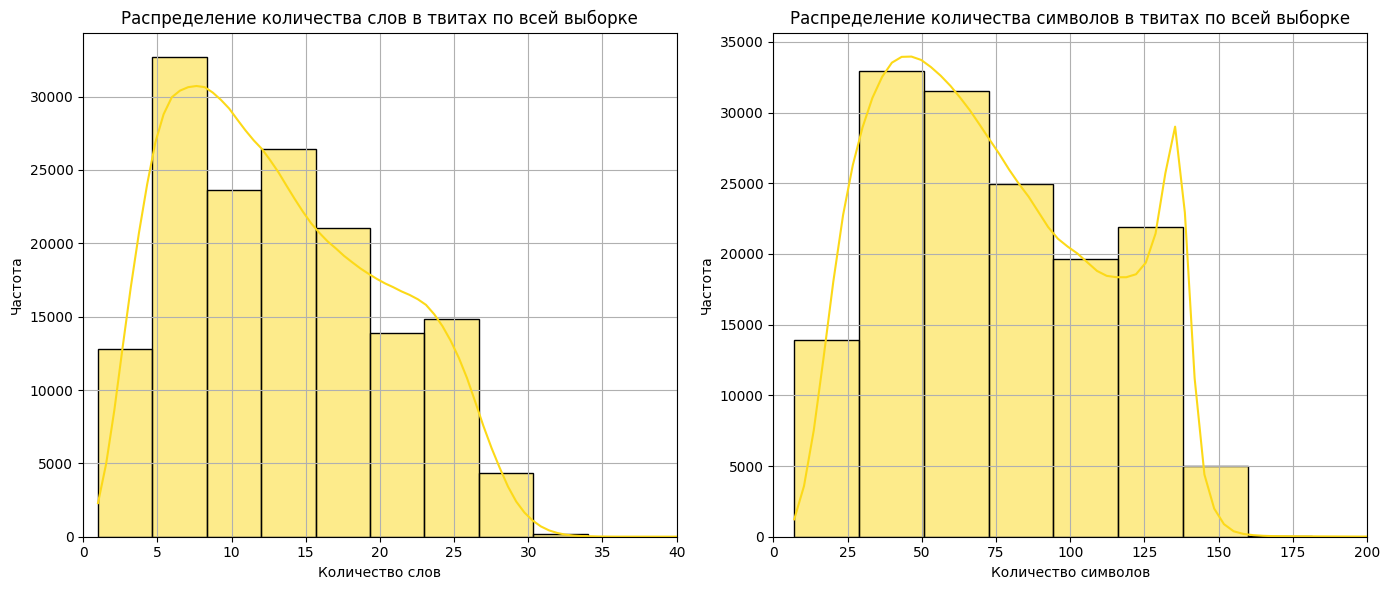

In [20]:
#График распределения количества слов в твитах
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['word_count'], bins=30, color='#fcd918', kde=True)
plt.title('Распределение количества слов в твитах по всей выборке')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.grid()

#График распределения количества символов в твитах
plt.subplot(1, 2, 2)
sns.histplot(df['char_count'], bins=30, color='#fcd918', kde=True)
plt.title('Распределение количества символов в твитах по всей выборке')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.xlim(0, 200)
plt.grid()

plt.tight_layout()
plt.show()

**3.1.2. Распределение количества слов и символов в твитах позитивной тональности**

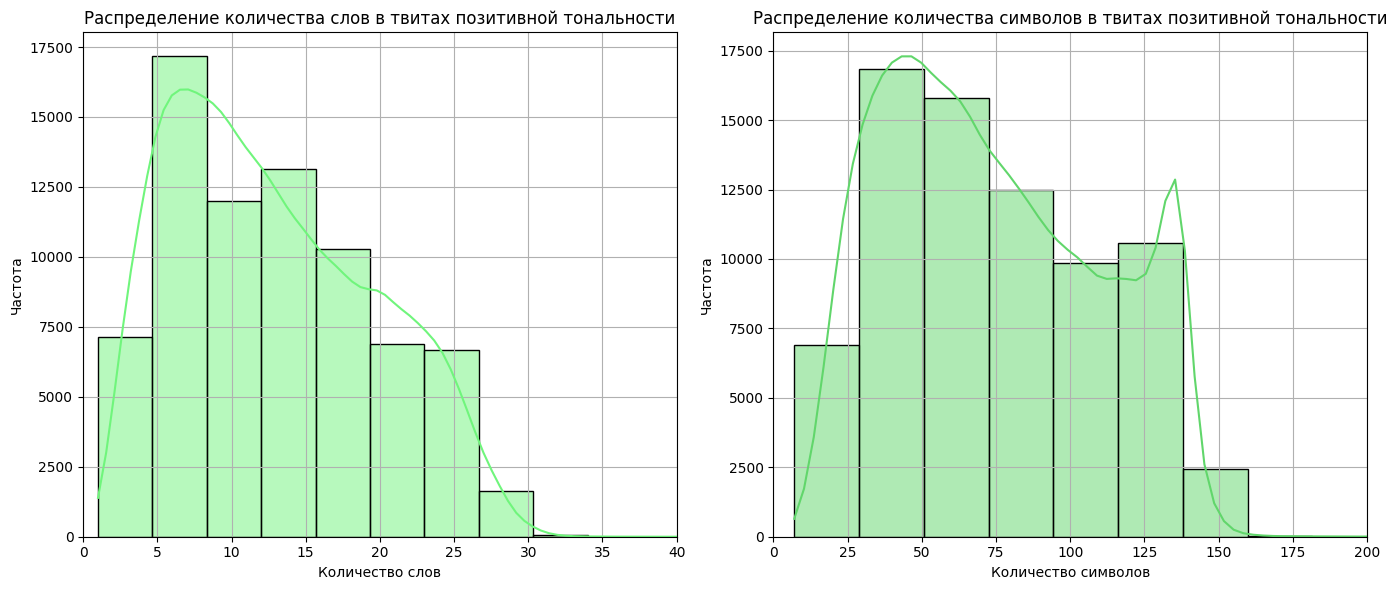

In [21]:
#График распределения количества слов в твитах
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['feeling'] == 1]['word_count'], bins=30, color='#70f57c', kde=True)
plt.title('Распределение количества слов в твитах позитивной тональности')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.grid()

#График распределения количества символов в твитах
plt.subplot(1, 2, 2)
sns.histplot(df[df['feeling'] == 1]['char_count'], bins=30, color='#61d66b', kde=True)
plt.title('Распределение количества символов в твитах позитивной тональности')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.xlim(0, 200)
plt.grid()

plt.tight_layout()
plt.show()

**3.1.3. Распределение количества слов и символов в твитах негативной тональности**

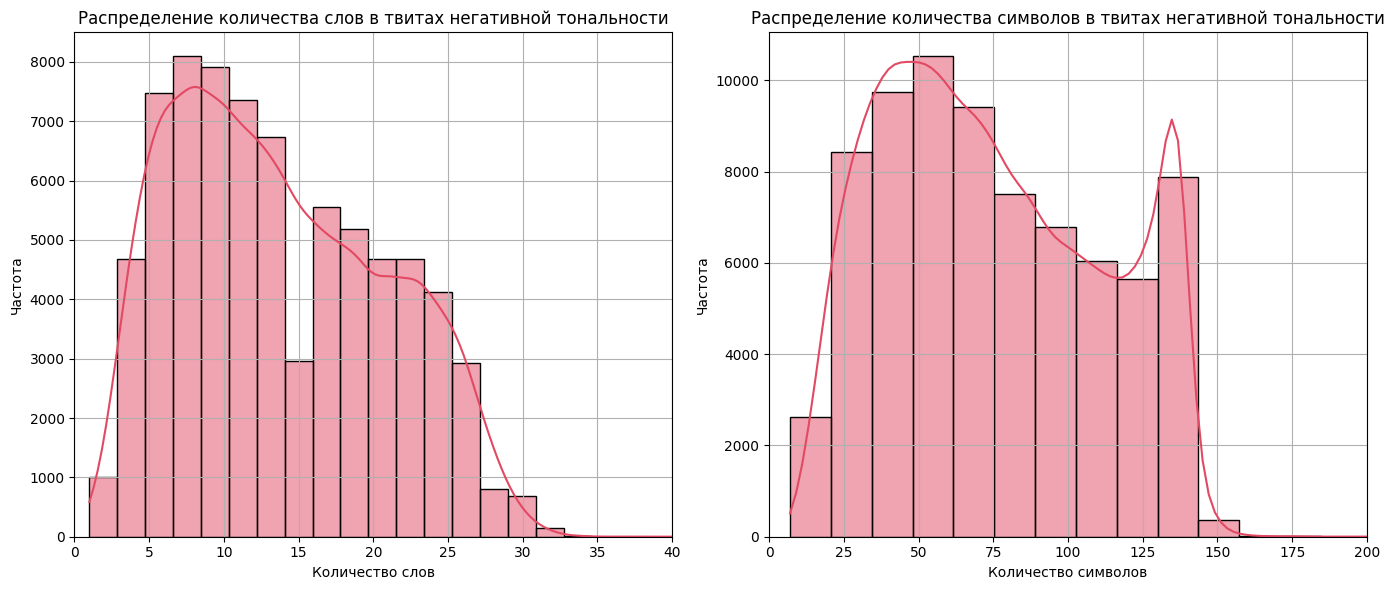

In [22]:
#График распределения количества слов в твитах
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['feeling'] == 0]['word_count'], bins=30, color='#e24962', kde=True)
plt.title('Распределение количества слов в твитах негативной тональности')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.grid()

#График распределения количества символов в твитах
plt.subplot(1, 2, 2)
sns.histplot(df[df['feeling'] == 0]['char_count'], bins=30, color='#e24962', kde=True)
plt.title('Распределение количества символов в твитах негативной тональности')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.xlim(0, 200)
plt.grid()

plt.tight_layout()
plt.show()

**3.1.4. Распределение минимальной, средней и максимальной длины твитов по всей выборке**

In [23]:
data = {'Длина твита': ['Минимальная длина', 'Средняя длина', 'Максимальная длина'],
        'Количество символов': [df['char_count'].min(), df['char_count'].mean(), df['char_count'].max()]}

df_stats = pd.DataFrame(data)

In [24]:
def format_number(x, index):
  if index in (0, 2):
    return f'{int(x)}'
  else:
    return f'{x:.2f}'

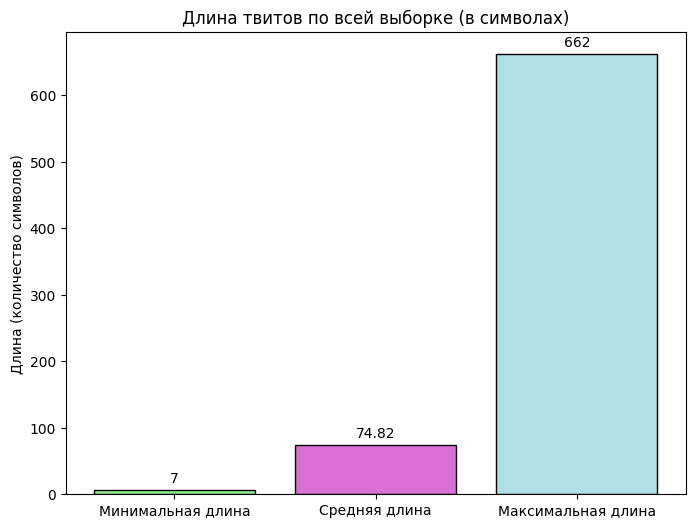

In [25]:
plt.figure(figsize=(8, 6))
bars = plt.bar(df_stats['Длина твита'], df_stats['Количество символов'], color=['lightgreen', 'orchid', 'powderblue'], edgecolor='black')
plt.title('Длина твитов по всей выборке (в символах)')
plt.ylabel('Длина (количество символов)')

plt.bar_label(bars, labels=[format_number(x, i) for i, x in enumerate(df_stats['Количество символов'])], padding=3)

plt.show()

**3.1.5. Распределение минимальной, средней и максимальной длины твитов позитивной и негативной тональностей**

In [26]:
group_char = df.groupby(['feeling']).agg(
        mean_length =('char_count', 'mean'),
        min_length =('char_count', 'min'),
        max_length =('char_count','max'),
        count = ('char_count', 'count')
)
group_char

,mean_length,min_length,max_length,count
feeling,,,,
0,75.242045,7,417,75019
1,74.400635,7,662,74966


In [27]:
group_char

,mean_length,min_length,max_length,count
feeling,,,,
0,75.242045,7,417,75019
1,74.400635,7,662,74966


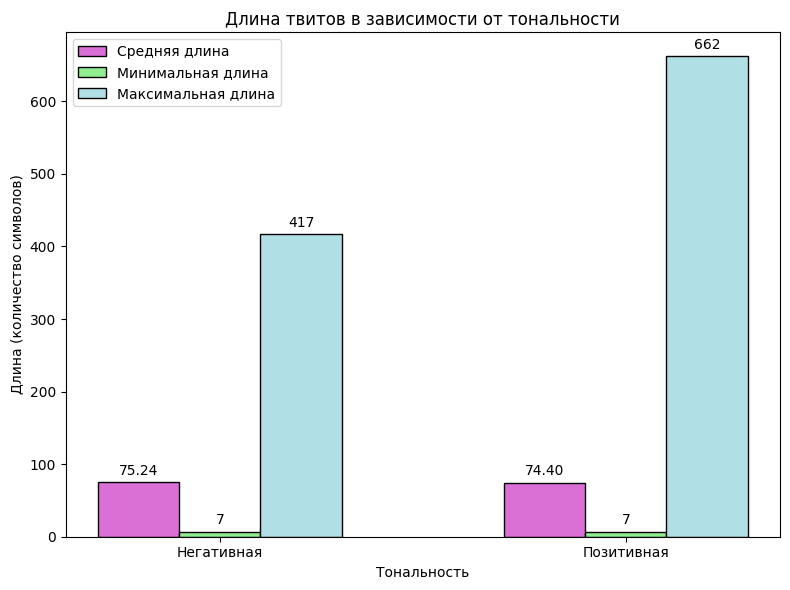

In [28]:
plt.figure(figsize=(8, 6))

x = range(len(group_char))
width = 0.2  #Ширина столбцов

plt.bar([p - width for p in x], group_char['mean_length'], width, label='Средняя длина', color='orchid', edgecolor='black')
plt.bar(x, group_char['min_length'], width, label='Минимальная длина', color='lightgreen', edgecolor='black')
plt.bar([p + width for p in x], group_char['max_length'], width, label='Максимальная длина', color='powderblue', edgecolor='black')

for i in x:
    plt.text(i - width, group_char['mean_length'].iloc[i] + 10, f"{group_char['mean_length'].iloc[i]:.2f}", ha='center', color='black')
    plt.text(i, group_char['min_length'].iloc[i] + 10, f"{group_char['min_length'].iloc[i]:}", ha='center', color='black')
    plt.text(i + width, group_char['max_length'].iloc[i] + 10, f"{group_char['max_length'].iloc[i]}", ha='center', color='black')

plt.ylabel('Длина (количество символов)')
plt.xlabel('Тональность')
plt.title('Длина твитов в зависимости от тональности')
plt.xticks(x, ['Негативная', 'Позитивная'])
plt.legend()
plt.tight_layout()
plt.show()

Перед тем как начать исследовать датасет полноценно, очистим текст от ненужных для анализа данных. Для этого в каждом твите оставим только "небуквы": уберём все цифры, знаки препинания и любые другие символы, которые не относятся к буквам (в частности, лишние пробелы). Помимо этого выравним регистр - объединим таким образом слова, которые означают одно и то же (например, *sun* = *SUN*, *sun*, *Sun*).

# **АНАЛИЗ ЗНАКОВ**

### **3.2. Предобработка текста**

**Этапы очистки данных от зашумлений:**
1. заменяем стандартные HTML-сущности на соответствующие символы. Примеры:
  *   & quot; --> "
  *   & amp; --> &
  *   & lt; --> <
  *   & gt; --> >
  *   & apos; или &#39; --> '
2. удаляем электронные адреса (например, *1234_world@abcde.lol*) и ведём статистику по ним
2. удаляем никнеймы (например, *@xxxx9010*) и ведём статистику по ним
3. удаляем ссылки на сайты в формате *www* и *http* и ведём статистику по ним
5. удаляем HTML-теги и ведём статистику по ним
6. удаляем хэштеги и ведём статистику по ним

In [29]:
df.head()

,feeling,tweet,word_count,char_count
0,0,Starting back at work today Looks like it'l...,16,87
1,1,Sugar levels dropping... munchies setting in. ...,16,103
2,1,@karineb22 yeah!!! have a great summer break!,7,46
3,1,hannah montana was very good. now going to re...,10,59
4,1,"@Mayra326 aww, have fun! I just had my 3D las...",11,53


**3.2.1. Обработка HTML-cущностей**

In [30]:
from html import unescape

In [31]:
df['tweet'] = df['tweet'].apply(unescape)

In [32]:
HTML_symbols_check = ['&quot;', '&amp;', '&lt', '&gt;', '&apos;', '&#39;'] #Проверяем, что HTML-cущности заменены на соответствующие символы

for symbol in HTML_symbols_check:
    if df['tweet'].str.contains(symbol).any():
        print(f"Символ '{symbol}' найден в датасете.")
    else:
        print(f"Символ '{symbol}' не найден в датасете.")

Символ '&quot;' не найден в датасете.
Символ '&amp;' не найден в датасете.
Символ '&lt' не найден в датасете.
Символ '&gt;' не найден в датасете.
Символ '&apos;' не найден в датасете.
Символ '&#39;' не найден в датасете.


**3.2.2. Обработка электронных адресов**

In [33]:
import re
from collections import Counter

In [34]:
emails = df['tweet'].str.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}').sum()
emails_count = Counter(emails)

In [35]:
df_emails_count = pd.DataFrame(emails_count.items(), columns=['email', 'count'])

In [36]:
df_emails_count.head()

,email,count
0,gemma@illuminate-coaching.co.uk,1
1,rheckendo@yahoo.com,1
2,dzinn3@gmail.com,1
3,demilovato_mexican_fans@hotmail.com,1
4,hsnaa_040807@hotmail.com,1


In [37]:
df_emails_count.sort_values(by='count', ascending=False).head() #Статистика по электронным адресам

,email,count
12,fuseboxradio@gmail.com,2
0,gemma@illuminate-coaching.co.uk,1
39,bzt@storebrand.no,1
29,jimbojose-jimbo@hotmail.com,1
30,andreita_princes_pink@hotmail.com,1


**3.2.3. Обработка никнеймов**

**Два варианта:**
1. @\w+

2. @([A-Za-z0-9_]{1,}) (СКЛОНЯЮСЬ К ЭТОМУ)

Чем отличаются? При использовании @\w+ есть доп. никнеймы (?):
  * @SÃ
  * @minmÃ
  * @Ã

In [38]:
nicknames = df['tweet'].str.findall(r'@([A-Za-z0-9_]{1,})').sum()
nicknames_count = Counter(nicknames)

In [39]:
df_nicks_count = pd.DataFrame(nicknames_count.items(), columns=['nickname', 'count'])

In [40]:
df_nicks_count

,nickname,count
0,karineb22,1
1,Mayra326,1
2,asherroth,3
3,sunday67,1
4,DavidBedwell,1
...,...,...
57222,krikitmedia,1
57223,strmofconscious,1
57224,seanhfitz,1
57225,4,1


In [41]:
df_nicks_count.sort_values(by='count', ascending=False).head() #Cтатистика по никам

,nickname,count
252,mileycyrus,382
193,tommcfly,347
237,ddlovato,310
19,Jonasbrothers,119
49,DonnieWahlberg,117


**3.2.4. Обработка ссылок (РАБОТАЕТ, но re написал GPT)**

In [42]:
urls = df['tweet'].str.findall(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})').sum()
urls_count = Counter(urls)

In [43]:
df_urls_count = pd.DataFrame(urls_count.items(), columns=['url', 'count'])

In [44]:
df_urls_count

,url,count
0,http://www.myspace.com/poloclub,1
1,http://plurk.com/p/vh7db,1
2,http://tinyurl.com/csclps,1
3,http://twitpic.com/794aw,2
4,http://is.gd/JjUQ,1
...,...,...
6521,http://tumblr.com/x6y1mmpel,1
6522,http://bit.ly/Px2ne,1
6523,http://bit.ly/IULNA,1
6524,http://tinyurl.com/o9dwbf,1


In [45]:
df_urls_count.sort_values(by='count', ascending=False).head() #Статистика по ссылкам

,url,count
110,www.tweeteradder.com,72
161,http://tweet.sg,70
261,www.tweeterfollow.com,56
553,www.iamsoannoyed.com,20
70,www.m2e.asia,15


**3.2.5. Обработка HTML-тегов**

In [46]:
htmls = df['tweet'].str.findall(r'<[^>]+>').sum()
htmls_count = Counter(htmls)

In [47]:
df_htmls_count = pd.DataFrame(htmls_count.items(), columns=['html', 'count'])

In [48]:
df_htmls_count

,html,count
0,< monica>,3
1,<b>,1
2,<.< >,1
3,<T>,1
4,<quick..blame him for sumpin>,1
...,...,...
86,<Fob is my life<3>,1
87,<batedbreath>,1
88,<dusting self off>,1
89,<looking both weys>,1


In [49]:
df_htmls_count.sort_values(by='count', ascending=False).head() #Статистика по HTML-символам

,html,count
0,< monica>,3
6,"<Que sera, sera!>",2
43,<sigh>,2
18,<3AaRoN-->,2
11,<hug>,2


**3.2.6. Обработка хэштегов**

In [50]:
hashtags = df['tweet'].str.findall(r'#\w+').sum()
hashtags_count = Counter(hashtags)

In [51]:
df_hashtags_count = pd.DataFrame(hashtags_count.items(), columns=['hashtag', 'count'])

In [52]:
df_hashtags_count

,hashtag,count
0,#SXSEMIA,1
1,#squarespace,95
2,#ACBF,1
3,#KariDosai,1
4,#FF,53
...,...,...
2111,#Confessions,1
2112,#of,1
2113,#a,1
2114,#corporate,1


In [53]:
df_hashtags_count.sort_values(by='count', ascending=False).head() #Статистика по hashtags

,hashtag,count
13,#followfriday,198
46,#fb,184
1,#squarespace,95
4,#FF,53
220,#1,50


Создадим столбцы, которые будут отражать количество вхождений электронной почты, никнейма, ссылки, HTML-тега и хэштега в каждом твите:
* 1 - элемент в твите есть,
* 0 - иначе.




In [54]:
#Функции для подсчета количества элементов в твите
def count_emails(tweet):
    return len(re.findall(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', tweet))

def count_nicknames(tweet):
    return len(re.findall(r'@([A-Za-z0-9_]{1,})', tweet))

def count_urls(tweet):
    return len(re.findall(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', tweet))

def count_html(tweet):
    return len(re.findall(r'<[^>]+>', tweet))

def count_hashtags(tweet):
    return len(re.findall(r'#\w+', tweet))

In [55]:
df['email_count'] = df['tweet'].apply(count_emails)
df['nickname_count'] = df['tweet'].apply(count_nicknames)
df['url_count'] = df['tweet'].apply(count_urls)
df['html_count'] = df['tweet'].apply(count_html)
df['hashtag_count'] = df['tweet'].apply(count_hashtags)

In [56]:
df.sample(10)

,feeling,tweet,word_count,char_count,email_count,nickname_count,url_count,html_count,hashtag_count
33036,0,I need a massage,4,17,0,0,0,0,0
57442,1,"@onezumi thanks for the follow, and the advert...",8,54,0,1,0,0,0
109363,0,"Bad timing, Percy http://tinyurl.com/obz8fx",4,44,0,0,1,0,0
53442,0,im scared and wish i wouldnt have watched saw ...,10,51,0,0,0,0,0
81127,0,@azlisa I was at work and there were sad thing...,18,91,0,1,0,0,0
134328,1,@DCCheapSeats I can't see... *pokes TV* I've o...,20,122,0,1,0,0,0
61355,0,is a very tired tweeter,5,25,0,0,0,0,0
54539,0,Oh why is there always less time than tasks?,9,45,0,0,0,0,0
93466,1,Oh Yea Special Shout out to @ElevatetheGame an...,16,96,0,2,0,0,0
116403,1,@BantamEditor you should totally show up @ 8;...,15,77,0,1,0,0,0


In [57]:
#Количество элементов по тональности
group_email = df.groupby('feeling')['email_count'].sum()
group_nickname = df.groupby('feeling')['nickname_count'].sum()
group_url = df.groupby('feeling')['url_count'].sum()
group_html = df.groupby('feeling')['html_count'].sum()
group_hashtag = df.groupby('feeling')['hashtag_count'].sum()

In [58]:
elements = {
    'электронных адресов': group_email,
    'никнеймов': group_nickname,
    'URL-адресов': group_url,
    'HTML-тегов': group_html,
    'хэштегов': group_hashtag
}

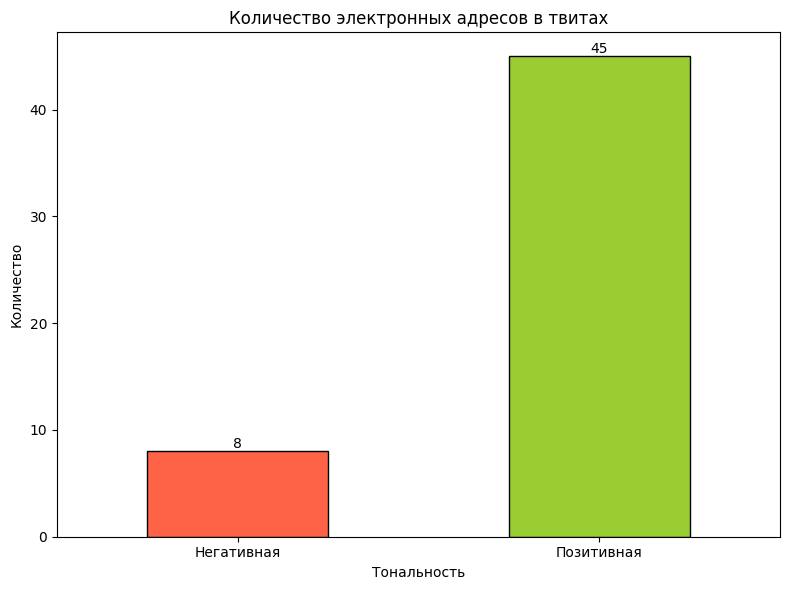

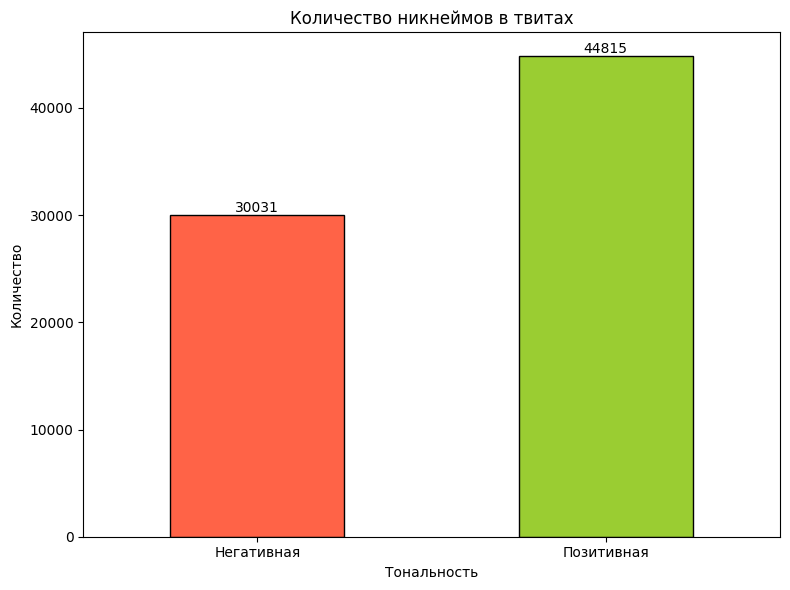

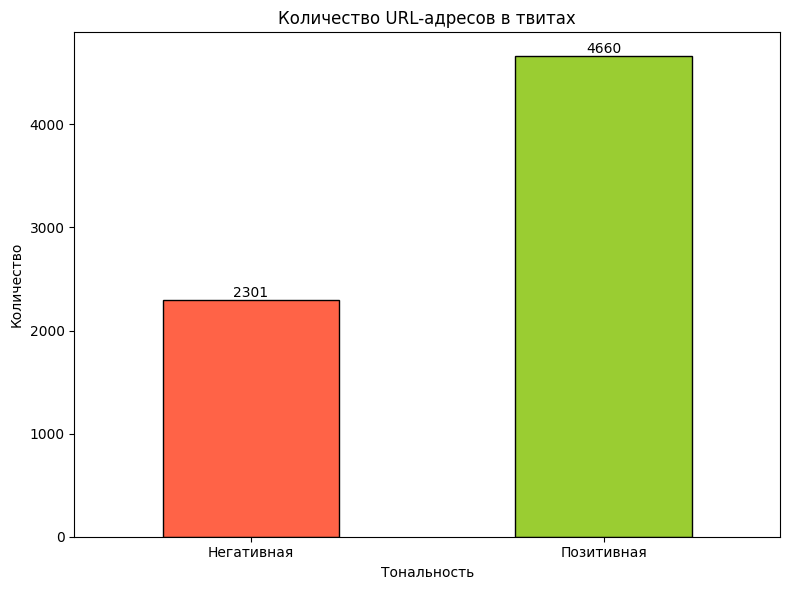

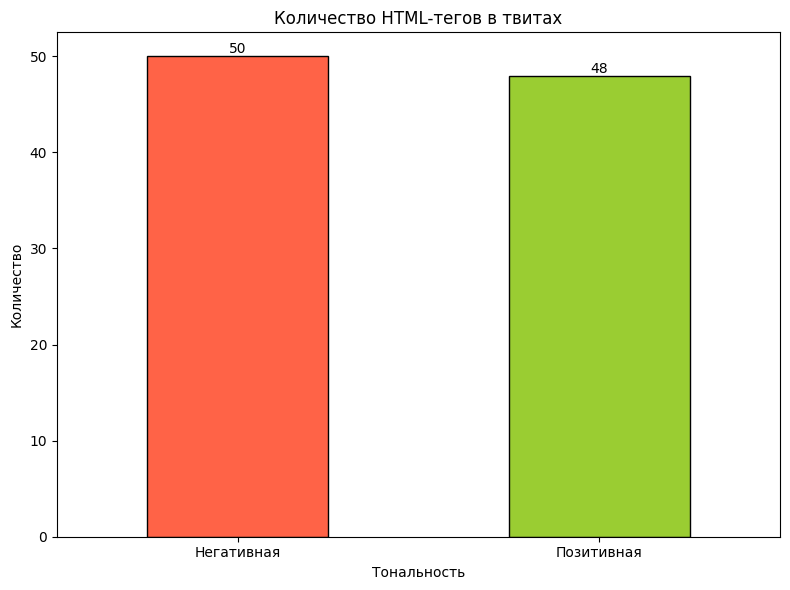

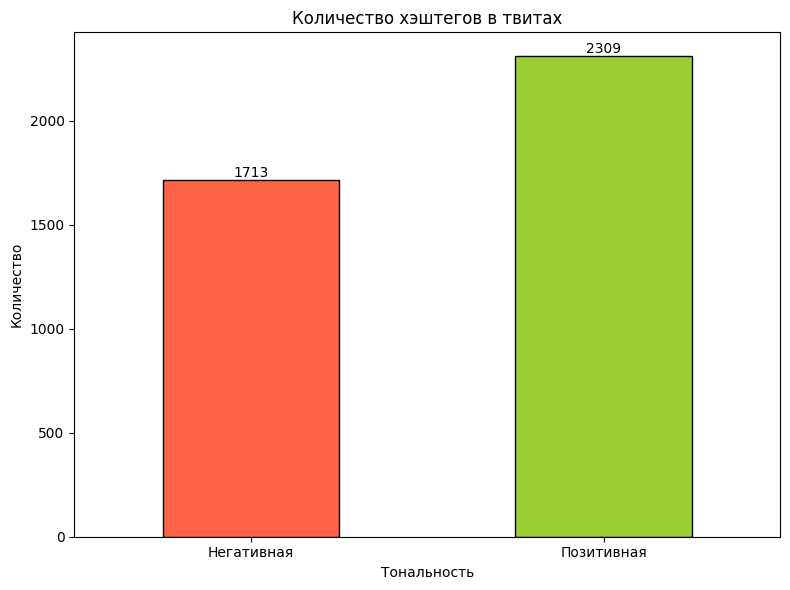

In [59]:
for element, counts in elements.items():
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color=['tomato', 'yellowgreen'], edgecolor='black')
    plt.title(f'Количество {element} в твитах')
    plt.xlabel('Тональность')
    plt.ylabel('Количество')
    plt.xticks(ticks=[0, 1], labels=['Негативная', 'Позитивная'], rotation=0)

    for index, value in enumerate(counts):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

Удаляем все найденные шумы:

In [60]:
df['tweet'] = df['tweet'].str.replace(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', regex=True) #Удаляем emails
df['tweet'] = df['tweet'].str.replace(r'@([A-Za-z0-9_]{1,})', '', regex=True) #Удаляем ники
df['tweet'] = df['tweet'].str.replace(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', '', regex=True) #Удаляем urls
df['tweet'] = df['tweet'].str.replace(r'<[^>]+>', '', regex=True) #Удаляем HTML-символы
df['tweet'] = df['tweet'].str.replace(r'#\w+', '', regex=True) #Удаляем hashtags

Приводим твиты к нижнему регистру и удаляем в них все "небуквы":

In [61]:
df['tweet'] = df['tweet'].str.lower()

In [62]:
df['cleaned_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z\s]', '', regex=True) #Удаляем знаки препинания и цифры и оставляем только буквы и пробелы

In [63]:
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\s+', ' ', regex=True).str.strip()  #Удаляем лишние пробелы

In [64]:
df

,feeling,tweet,word_count,char_count,email_count,nickname_count,url_count,html_count,hashtag_count,cleaned_tweet
0,0,starting back at work today looks like it'l...,16,87,0,0,0,0,0,starting back at work today looks like itll be...
1,1,sugar levels dropping... munchies setting in. ...,16,103,0,0,0,0,0,sugar levels dropping munchies setting in luck...
2,1,yeah!!! have a great summer break!,7,46,0,1,0,0,0,yeah have a great summer break
3,1,hannah montana was very good. now going to re...,10,59,0,0,0,0,0,hannah montana was very good now going to read...
4,1,"aww, have fun! i just had my 3d last week!",11,53,0,1,0,0,0,aww have fun i just had my d last week
...,...,...,...,...,...,...,...,...,...,...
149980,0,had a great night at tabs but now i'm missing ...,14,65,0,0,0,0,0,had a great night at tabs but now im missing c...
149981,1,what a night at work.. church in the morning,9,45,0,0,0,0,0,what a night at work church in the morning
149982,0,this book is terrible im used 2 reading all ...,25,137,0,0,0,0,0,this book is terrible im used reading all make...
149983,0,"updates? any? i miss your updates, guys!",8,57,0,1,0,0,0,updates any i miss your updates guys


**3.3.1. Распределение количества слов и символов в твитах по всей выборке**

In [65]:
df['word_count_cleaned'] = df['cleaned_tweet'].str.split().str.len() #Количество слов в твитах

In [66]:
df['char_count_cleaned'] = df['cleaned_tweet'].str.len() #Количество символов в твитах

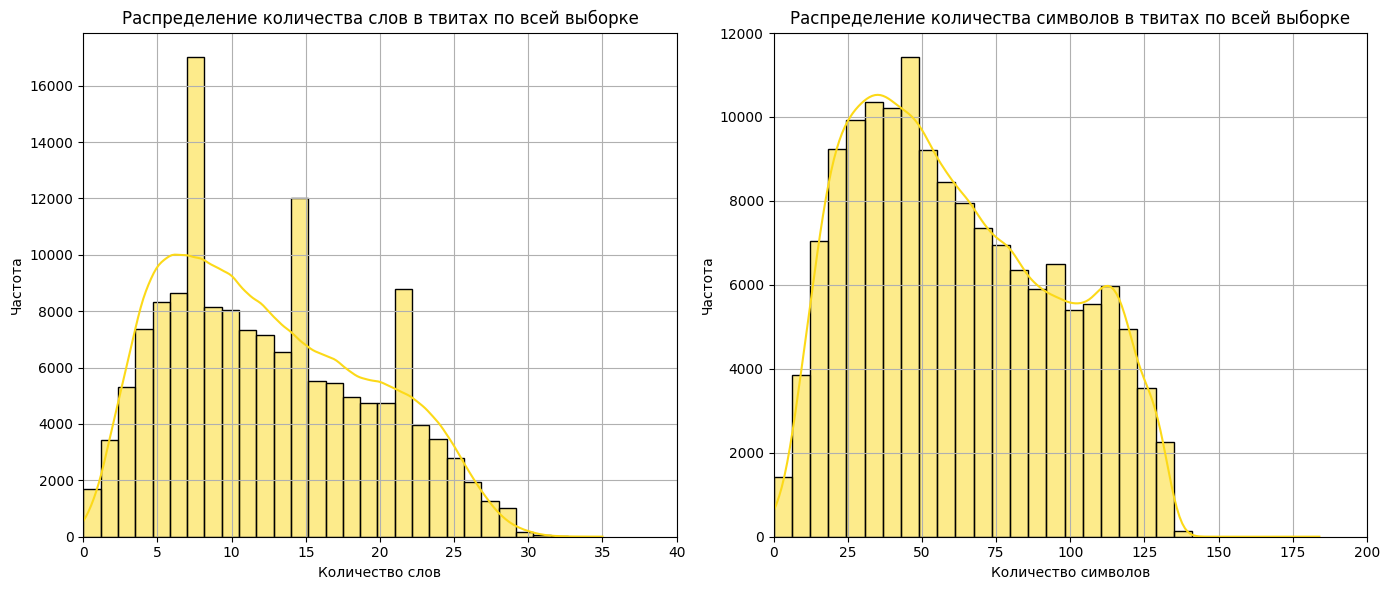

In [67]:
#График распределения количества слов в твитах
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['word_count_cleaned'], bins=30, color='#fcd918', kde=True)
plt.title('Распределение количества слов в твитах по всей выборке')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.grid()

#График распределения количества символов в твитах
plt.subplot(1, 2, 2)
sns.histplot(df['char_count_cleaned'], bins=30, color='#fcd918', kde=True)
plt.title('Распределение количества символов в твитах по всей выборке')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.xlim(0, 200)
plt.grid()

plt.tight_layout()
plt.show()

**3.3.2. Распределение количества слов и символов в твитах позитивной выборки**

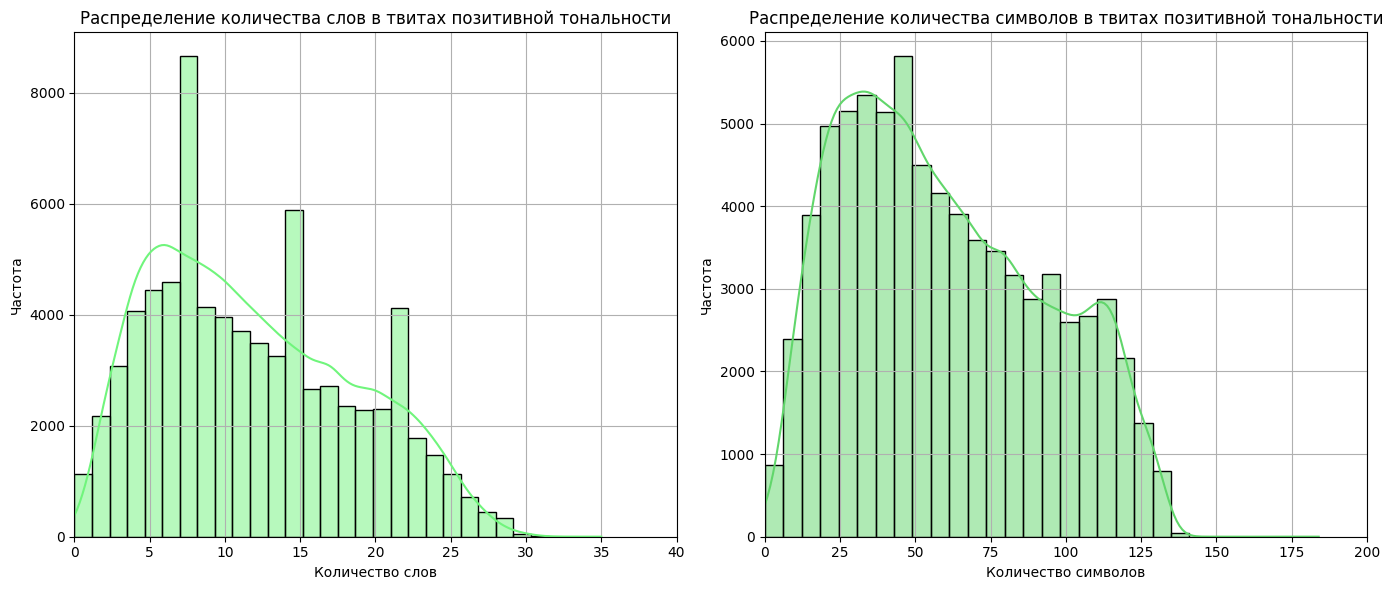

In [68]:
#График распределения количества слов в твитах
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['feeling'] == 1]['word_count_cleaned'], bins=30, color='#70f57c', kde=True)
plt.title('Распределение количества слов в твитах позитивной тональности')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.grid()

#График распределения количества символов в твитах
plt.subplot(1, 2, 2)
sns.histplot(df[df['feeling'] == 1]['char_count_cleaned'], bins=30, color='#61d66b', kde=True)
plt.title('Распределение количества символов в твитах позитивной тональности')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.xlim(0, 200)
plt.grid()

plt.tight_layout()
plt.show()

**3.3.3. Распределение количества слов и символов в твитах позитивной выборки**

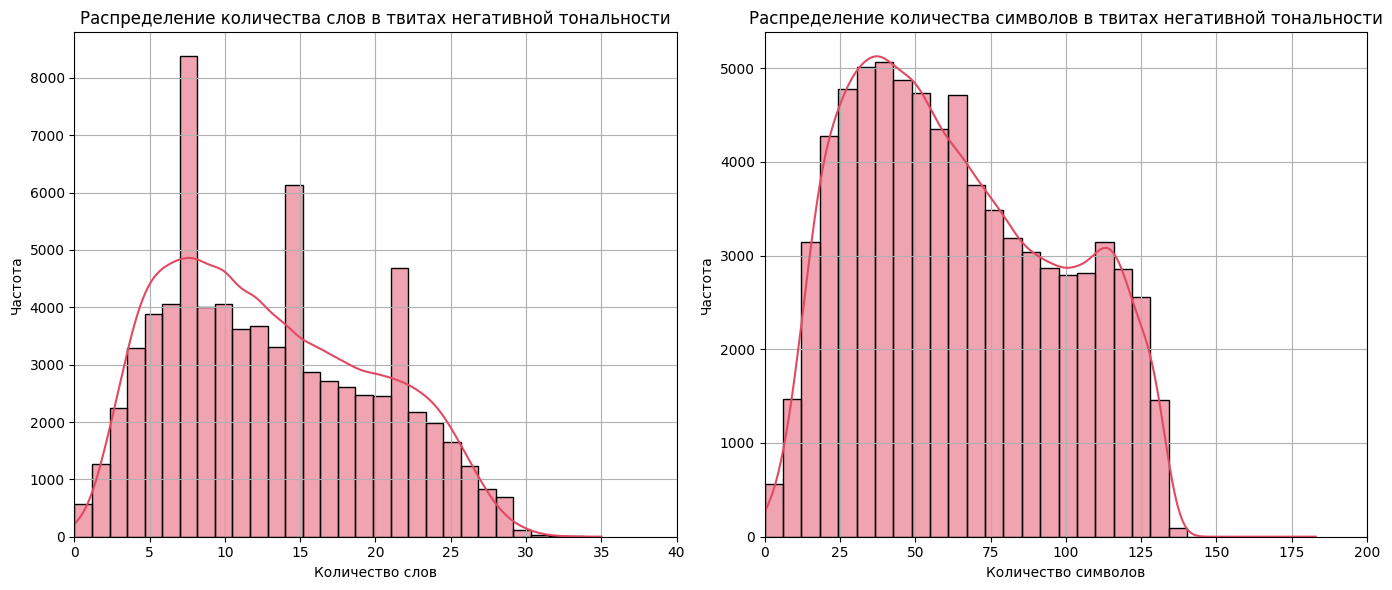

In [69]:
#График распределения количества слов в твитах
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['feeling'] == 0]['word_count_cleaned'], bins=30, color='#e24962', kde=True)
plt.title('Распределение количества слов в твитах негативной тональности')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.grid()

#График распределения количества символов в твитах
plt.subplot(1, 2, 2)
sns.histplot(df[df['feeling'] == 0]['char_count_cleaned'], bins=30, color='#e24962', kde=True)
plt.title('Распределение количества символов в твитах негативной тональности')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.xlim(0, 200)
plt.grid()

plt.tight_layout()
plt.show()

**3.3.4. Распределение минимальной, средней и максимальной длины твитов по всей выборке**

In [70]:
df

,feeling,tweet,word_count,char_count,email_count,nickname_count,url_count,html_count,hashtag_count,cleaned_tweet,word_count_cleaned,char_count_cleaned
0,0,starting back at work today looks like it'l...,16,87,0,0,0,0,0,starting back at work today looks like itll be...,16,82
1,1,sugar levels dropping... munchies setting in. ...,16,103,0,0,0,0,0,sugar levels dropping munchies setting in luck...,16,98
2,1,yeah!!! have a great summer break!,7,46,0,1,0,0,0,yeah have a great summer break,6,30
3,1,hannah montana was very good. now going to re...,10,59,0,0,0,0,0,hannah montana was very good now going to read...,10,55
4,1,"aww, have fun! i just had my 3d last week!",11,53,0,1,0,0,0,aww have fun i just had my d last week,10,38
...,...,...,...,...,...,...,...,...,...,...,...,...
149980,0,had a great night at tabs but now i'm missing ...,14,65,0,0,0,0,0,had a great night at tabs but now im missing c...,14,62
149981,1,what a night at work.. church in the morning,9,45,0,0,0,0,0,what a night at work church in the morning,9,42
149982,0,this book is terrible im used 2 reading all ...,25,137,0,0,0,0,0,this book is terrible im used reading all make...,24,131
149983,0,"updates? any? i miss your updates, guys!",8,57,0,1,0,0,0,updates any i miss your updates guys,7,36


In [71]:
data_cleaned = {'Длина твита': ['Минимальная длина', 'Средняя длина', 'Максимальная длина'],
        'Количество символов': [df['char_count_cleaned'].min(), df['char_count_cleaned'].mean(), df['char_count_cleaned'].max()]}

df_stats_cleaned = pd.DataFrame(data_cleaned)

In [72]:
def format_number(x, index):
  if index in (0, 2):
    return f'{int(x)}'
  else:
    return f'{x:.2f}'

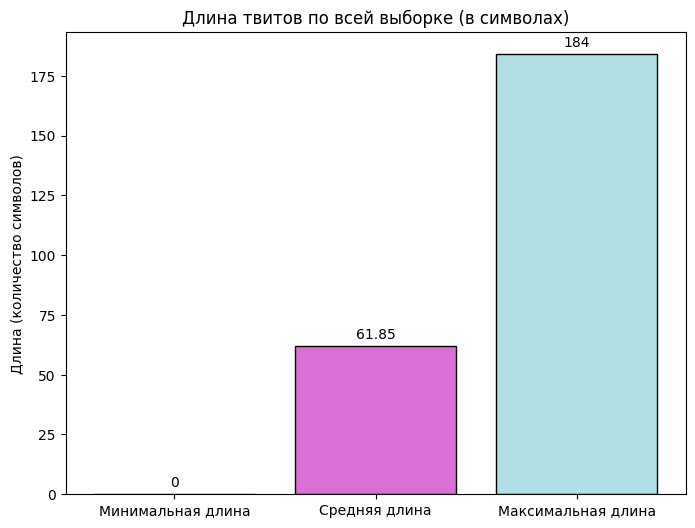

In [73]:
plt.figure(figsize=(8, 6))
bars = plt.bar(df_stats_cleaned['Длина твита'], df_stats_cleaned['Количество символов'], color=['lightgreen', 'orchid', 'powderblue'], edgecolor='black')
plt.title('Длина твитов по всей выборке (в символах)')
plt.ylabel('Длина (количество символов)')

plt.bar_label(bars, labels=[format_number(x, i) for i, x in enumerate(df_stats_cleaned['Количество символов'])], padding=3)

plt.show()

**3.3.5. Распределение минимальной, средней и максимальной длины твитов позитивной тональности**

In [74]:
group_char_cleaned = df.groupby(['feeling']).agg(
        mean_length =('char_count_cleaned', 'mean'),
        min_length =('char_count_cleaned', 'min'),
        max_length =('char_count_cleaned','max'),
        count = ('char_count_cleaned', 'count')
)

In [75]:
group_char_cleaned

,mean_length,min_length,max_length,count
feeling,,,,
0,64.045815,0,183,75019
1,59.656111,0,184,74966


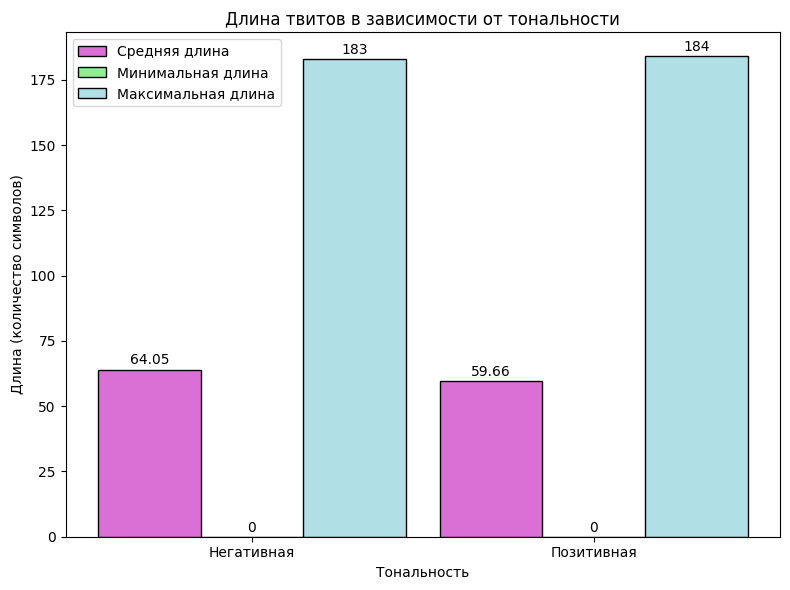

In [76]:
plt.figure(figsize=(8, 6))

x = range(len(group_char_cleaned))
width = 0.3  #Ширина столбцов

plt.bar([p - width for p in x], group_char_cleaned['mean_length'], width, label='Средняя длина', color='orchid', edgecolor='black')
plt.bar(x, group_char_cleaned['min_length'], width, label='Минимальная длина', color='lightgreen', edgecolor='black')
plt.bar([p + width for p in x], group_char_cleaned['max_length'], width, label='Максимальная длина', color='powderblue', edgecolor='black')

for i in x:
    plt.text(i - width, group_char_cleaned['mean_length'].iloc[i] + 2, f"{group_char_cleaned['mean_length'].iloc[i]:.2f}", ha='center', color='black')
    plt.text(i, group_char_cleaned['min_length'].iloc[i] + 2, f"{group_char_cleaned['min_length'].iloc[i]:}", ha='center', color='black')
    plt.text(i + width, group_char_cleaned['max_length'].iloc[i] + 2, f"{group_char_cleaned['max_length'].iloc[i]}", ha='center', color='black')

plt.ylabel('Длина (количество символов)')
plt.xlabel('Тональность')
plt.title('Длина твитов в зависимости от тональности')
plt.xticks(x, ['Негативная', 'Позитивная'])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

На данном этапе датасет выглядит следующим обазом:

In [77]:
df

,feeling,tweet,word_count,char_count,email_count,nickname_count,url_count,html_count,hashtag_count,cleaned_tweet,word_count_cleaned,char_count_cleaned
0,0,starting back at work today looks like it'l...,16,87,0,0,0,0,0,starting back at work today looks like itll be...,16,82
1,1,sugar levels dropping... munchies setting in. ...,16,103,0,0,0,0,0,sugar levels dropping munchies setting in luck...,16,98
2,1,yeah!!! have a great summer break!,7,46,0,1,0,0,0,yeah have a great summer break,6,30
3,1,hannah montana was very good. now going to re...,10,59,0,0,0,0,0,hannah montana was very good now going to read...,10,55
4,1,"aww, have fun! i just had my 3d last week!",11,53,0,1,0,0,0,aww have fun i just had my d last week,10,38
...,...,...,...,...,...,...,...,...,...,...,...,...
149980,0,had a great night at tabs but now i'm missing ...,14,65,0,0,0,0,0,had a great night at tabs but now im missing c...,14,62
149981,1,what a night at work.. church in the morning,9,45,0,0,0,0,0,what a night at work church in the morning,9,42
149982,0,this book is terrible im used 2 reading all ...,25,137,0,0,0,0,0,this book is terrible im used reading all make...,24,131
149983,0,"updates? any? i miss your updates, guys!",8,57,0,1,0,0,0,updates any i miss your updates guys,7,36


В целом количество слов в твитах находится в пределах 40 слов (200 символов).
Чаще всего каждый твит состоит из 8-12 слов (30-75 символов).
**Примечание.** Количество символов посчтано до обработки текста.

Минимальное количество символов в твитах составляет 7 для обоих типов тональности. При этом среднее число символов в твитах позитивной тональности  равно 74,12, в твитах негативной тональности - 75,07. Как мы видим, среднее и минимально число символов практически не отличается в зависимости от настроения твита.

При этом максимальное число символов в твитах позитивной тональности приблизительно в 1,5 раза превышает эту величину в твитах негативной тональности -- 662 против 417 соответственно.

# **4) Обработка текста**

В главе 4
1.  проводится токенизация текста по словам -- каждый твит рабивается на токены (слова);
2.  удаляются стоп-слова - слова, которые не несут большой смысловой нагрузки, но зашумляют данные. К таким словам относятся союзы, междометия, артикли и др.;
3.  рассматривается количество слов различных частей речи в твитах. Для наглядности строится горизонтальная столбчатая диаграмма (bar);
4.  проводится лемматизация -- приведение каждого слова к канонической форме (лемме);
5. анализируются облака слов и топ-20 слов твитов позитивной и негативной тональностей;
6. строятся би- и триграммы для твитов обоих типов тональности.


In [78]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

### **4.1. Токенизация**

In [79]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vladkopchev/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladkopchev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
df['tokens'] = df['cleaned_tweet'].apply(word_tokenize)

In [81]:
df['tokens']

0         [starting, back, at, work, today, looks, like,...
1         [sugar, levels, dropping, munchies, setting, i...
2                     [yeah, have, a, great, summer, break]
3         [hannah, montana, was, very, good, now, going,...
4         [aww, have, fun, i, just, had, my, d, last, week]
                                ...                        
149980    [had, a, great, night, at, tabs, but, now, im,...
149981    [what, a, night, at, work, church, in, the, mo...
149982    [this, book, is, terrible, im, used, reading, ...
149983         [updates, any, i, miss, your, updates, guys]
149984                                           [i, agree]
Name: tokens, Length: 149985, dtype: object

### **4.2. Удаление стоп-слов**

In [82]:
def delete_stopwords(tokens):
    cleaned = []
    for word in tokens:
        if word not in stop_words:
            cleaned.append(word)
    return cleaned

df['cleaned_tokens'] = df['tokens'].apply(delete_stopwords)

In [83]:
df['cleaned_tokens']

0         [starting, back, work, today, looks, like, itl...
1         [sugar, levels, dropping, munchies, setting, l...
2                              [yeah, great, summer, break]
3            [hannah, montana, good, going, read, twilight]
4                                    [aww, fun, last, week]
                                ...                        
149980    [great, night, tabs, im, missing, chad, going,...
149981                       [night, work, church, morning]
149982    [book, terrible, im, used, reading, make, beli...
149983                       [updates, miss, updates, guys]
149984                                              [agree]
Name: cleaned_tokens, Length: 149985, dtype: object

### **4.3. Лемматизация**

In [84]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vladkopchev/nltk_data...


In [85]:
def lemmatize_tokens(tokens):
    lemmatized = []
    for word in tokens:
        lemmatized.append(lemmatizer.lemmatize(word))
    return lemmatized

df['lemmatized'] = df['cleaned_tokens'].apply(lemmatize_tokens)

In [86]:
df

,feeling,tweet,word_count,char_count,email_count,nickname_count,url_count,html_count,hashtag_count,cleaned_tweet,word_count_cleaned,char_count_cleaned,tokens,cleaned_tokens,lemmatized
0,0,starting back at work today looks like it'l...,16,87,0,0,0,0,0,starting back at work today looks like itll be...,16,82,"[starting, back, at, work, today, looks, like,...","[starting, back, work, today, looks, like, itl...","[starting, back, work, today, look, like, itll..."
1,1,sugar levels dropping... munchies setting in. ...,16,103,0,0,0,0,0,sugar levels dropping munchies setting in luck...,16,98,"[sugar, levels, dropping, munchies, setting, i...","[sugar, levels, dropping, munchies, setting, l...","[sugar, level, dropping, munchies, setting, lu..."
2,1,yeah!!! have a great summer break!,7,46,0,1,0,0,0,yeah have a great summer break,6,30,"[yeah, have, a, great, summer, break]","[yeah, great, summer, break]","[yeah, great, summer, break]"
3,1,hannah montana was very good. now going to re...,10,59,0,0,0,0,0,hannah montana was very good now going to read...,10,55,"[hannah, montana, was, very, good, now, going,...","[hannah, montana, good, going, read, twilight]","[hannah, montana, good, going, read, twilight]"
4,1,"aww, have fun! i just had my 3d last week!",11,53,0,1,0,0,0,aww have fun i just had my d last week,10,38,"[aww, have, fun, i, just, had, my, d, last, week]","[aww, fun, last, week]","[aww, fun, last, week]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,0,had a great night at tabs but now i'm missing ...,14,65,0,0,0,0,0,had a great night at tabs but now im missing c...,14,62,"[had, a, great, night, at, tabs, but, now, im,...","[great, night, tabs, im, missing, chad, going,...","[great, night, tab, im, missing, chad, going, ..."
149981,1,what a night at work.. church in the morning,9,45,0,0,0,0,0,what a night at work church in the morning,9,42,"[what, a, night, at, work, church, in, the, mo...","[night, work, church, morning]","[night, work, church, morning]"
149982,0,this book is terrible im used 2 reading all ...,25,137,0,0,0,0,0,this book is terrible im used reading all make...,24,131,"[this, book, is, terrible, im, used, reading, ...","[book, terrible, im, used, reading, make, beli...","[book, terrible, im, used, reading, make, beli..."
149983,0,"updates? any? i miss your updates, guys!",8,57,0,1,0,0,0,updates any i miss your updates guys,7,36,"[updates, any, i, miss, your, updates, guys]","[updates, miss, updates, guys]","[update, miss, update, guy]"


### **4.4. Распределение частей речи**

In [87]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vladkopchev/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [88]:
df['pos_tags'] = df['lemmatized'].apply(pos_tag)

In [89]:
df['pos_tags']

0         [(starting, VBG), (back, RP), (work, NN), (tod...
1         [(sugar, NN), (level, NN), (dropping, VBG), (m...
2         [(yeah, RB), (great, JJ), (summer, NN), (break...
3         [(hannah, NN), (montana, NN), (good, JJ), (goi...
4            [(aww, NN), (fun, NN), (last, JJ), (week, NN)]
                                ...                        
149980    [(great, JJ), (night, NN), (tab, NN), (im, NN)...
149981    [(night, NN), (work, NN), (church, NN), (morni...
149982    [(book, NN), (terrible, JJ), (im, NN), (used, ...
149983    [(update, JJ), (miss, NN), (update, NN), (guy,...
149984                                        [(agree, NN)]
Name: pos_tags, Length: 149985, dtype: object

In [90]:
df

,feeling,tweet,word_count,char_count,email_count,nickname_count,url_count,html_count,hashtag_count,cleaned_tweet,word_count_cleaned,char_count_cleaned,tokens,cleaned_tokens,lemmatized,pos_tags
0,0,starting back at work today looks like it'l...,16,87,0,0,0,0,0,starting back at work today looks like itll be...,16,82,"[starting, back, at, work, today, looks, like,...","[starting, back, work, today, looks, like, itl...","[starting, back, work, today, look, like, itll...","[(starting, VBG), (back, RP), (work, NN), (tod..."
1,1,sugar levels dropping... munchies setting in. ...,16,103,0,0,0,0,0,sugar levels dropping munchies setting in luck...,16,98,"[sugar, levels, dropping, munchies, setting, i...","[sugar, levels, dropping, munchies, setting, l...","[sugar, level, dropping, munchies, setting, lu...","[(sugar, NN), (level, NN), (dropping, VBG), (m..."
2,1,yeah!!! have a great summer break!,7,46,0,1,0,0,0,yeah have a great summer break,6,30,"[yeah, have, a, great, summer, break]","[yeah, great, summer, break]","[yeah, great, summer, break]","[(yeah, RB), (great, JJ), (summer, NN), (break..."
3,1,hannah montana was very good. now going to re...,10,59,0,0,0,0,0,hannah montana was very good now going to read...,10,55,"[hannah, montana, was, very, good, now, going,...","[hannah, montana, good, going, read, twilight]","[hannah, montana, good, going, read, twilight]","[(hannah, NN), (montana, NN), (good, JJ), (goi..."
4,1,"aww, have fun! i just had my 3d last week!",11,53,0,1,0,0,0,aww have fun i just had my d last week,10,38,"[aww, have, fun, i, just, had, my, d, last, week]","[aww, fun, last, week]","[aww, fun, last, week]","[(aww, NN), (fun, NN), (last, JJ), (week, NN)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,0,had a great night at tabs but now i'm missing ...,14,65,0,0,0,0,0,had a great night at tabs but now im missing c...,14,62,"[had, a, great, night, at, tabs, but, now, im,...","[great, night, tabs, im, missing, chad, going,...","[great, night, tab, im, missing, chad, going, ...","[(great, JJ), (night, NN), (tab, NN), (im, NN)..."
149981,1,what a night at work.. church in the morning,9,45,0,0,0,0,0,what a night at work church in the morning,9,42,"[what, a, night, at, work, church, in, the, mo...","[night, work, church, morning]","[night, work, church, morning]","[(night, NN), (work, NN), (church, NN), (morni..."
149982,0,this book is terrible im used 2 reading all ...,25,137,0,0,0,0,0,this book is terrible im used reading all make...,24,131,"[this, book, is, terrible, im, used, reading, ...","[book, terrible, im, used, reading, make, beli...","[book, terrible, im, used, reading, make, beli...","[(book, NN), (terrible, JJ), (im, NN), (used, ..."
149983,0,"updates? any? i miss your updates, guys!",8,57,0,1,0,0,0,updates any i miss your updates guys,7,36,"[updates, any, i, miss, your, updates, guys]","[updates, miss, updates, guys]","[update, miss, update, guy]","[(update, JJ), (miss, NN), (update, NN), (guy,..."


**4.4.1. Распределение частей речи по всей выборке**

In [91]:
pos_counts = Counter()
for tags in df['pos_tags']:
    pos_counts.update(tag for word, tag in tags)

In [92]:
df_pos = pd.DataFrame(pos_counts.items(), columns=['Part of Speech', 'Count'])

In [93]:
df_pos.sort_values(by='Count', ascending=False).head()

,Part of Speech,Count
2,NN,502451
5,JJ,191909
7,RB,76466
0,VBG,54167
11,VB,44132


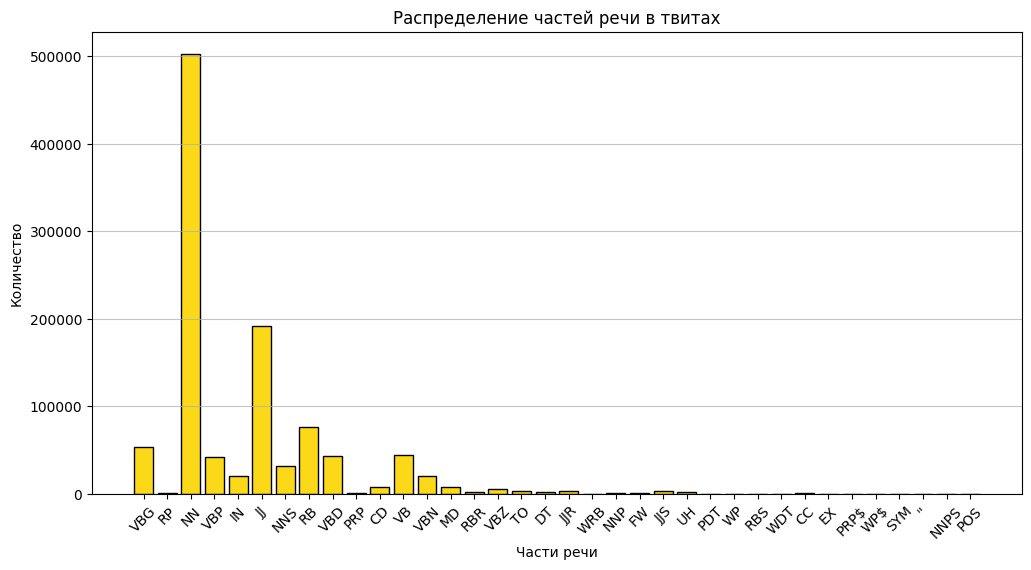

In [94]:
plt.figure(figsize=(12, 6))
plt.bar(df_pos['Part of Speech'], df_pos['Count'], color='#fcd918', edgecolor='black')
plt.title('Распределение частей речи в твитах')
plt.xlabel('Части речи')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

**4.4.1. Распределение частей речи в позитивных твитах**

In [95]:
df_pos = df[df['feeling'] == 1]

In [96]:
pos_counts_pos = Counter()
for tags in df_pos['pos_tags']:
    pos_counts_pos.update(tag for word, tag in tags)

In [97]:
df_pos_positive = pd.DataFrame(pos_counts_pos.items(), columns=['Part of Speech', 'Count'])

In [98]:
df_pos_positive.sort_values(by='Count', ascending=False).head()

,Part of Speech,Count
0,NN,244748
4,JJ,93133
3,RB,35569
1,VBG,26386
7,VB,21679


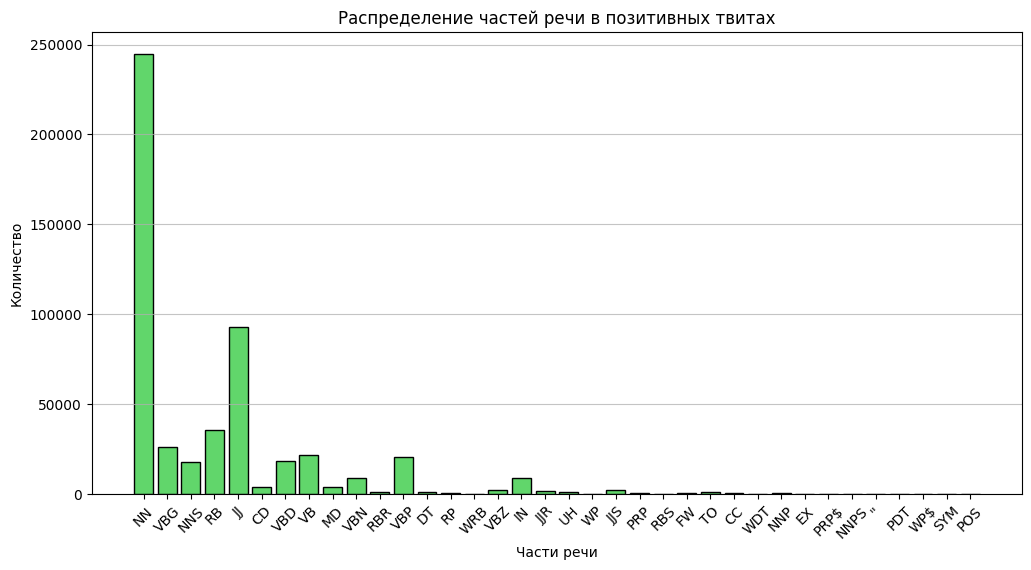

In [99]:
plt.figure(figsize=(12, 6))
plt.bar(df_pos_positive['Part of Speech'], df_pos_positive['Count'], color='#61d66b', edgecolor='black')
plt.title('Распределение частей речи в позитивных твитах')
plt.xlabel('Части речи')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

**4.4.3. Распределение частей речи в негативных твитах**

In [100]:
df_neg = df[df['feeling'] == 0]

In [101]:
pos_counts_neg = Counter()
for tags in df_neg['pos_tags']:
    pos_counts_neg.update(tag for word, tag in tags)

In [102]:
df_pos_negative = pd.DataFrame(pos_counts_neg.items(), columns=['Part of Speech', 'Count'])

In [103]:
df_pos_negative.sort_values(by='Count', ascending=False).head()

,Part of Speech,Count
2,NN,257703
5,JJ,98776
7,RB,40897
0,VBG,27781
6,VBD,25006


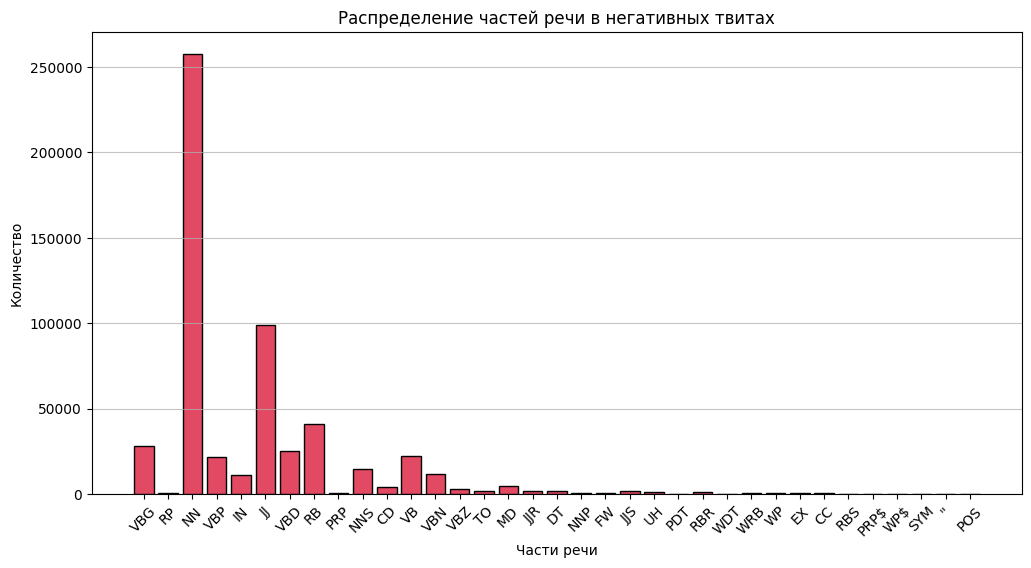

In [104]:
plt.figure(figsize=(12, 6))
plt.bar(df_pos_negative['Part of Speech'], df_pos_negative['Count'], color='#e24962', edgecolor='black')
plt.title('Распределение частей речи в негативных твитах')
plt.xlabel('Части речи')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


Наиболее используемая часть речи -- существительное в единственном числе (NN). Оно встречается 502 451 раз во всех твитах. На втором месте по частоте использования расположены прилагательные (JJ), на третьем -- наречия (RB). Они встречаются 191 909 и 76 466 раз соответственно.

Самыми популярными словами в позитивных твитах стали im, good, day, love и get, в негативных -- im, day, go, get и cant.

***TO BE CONTINUED...***

# **5) TF-IDF, word2vec + t-SNE**

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
# from gensim.models import Word2Vec

In [111]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df.lemmatized.str.join(' ')).toarray()

In [114]:
%%time

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(tfidf_matrix)

CPU times: user 1h 6min 27s, sys: 8min 44s, total: 1h 15min 11s
Wall time: 12min 33s


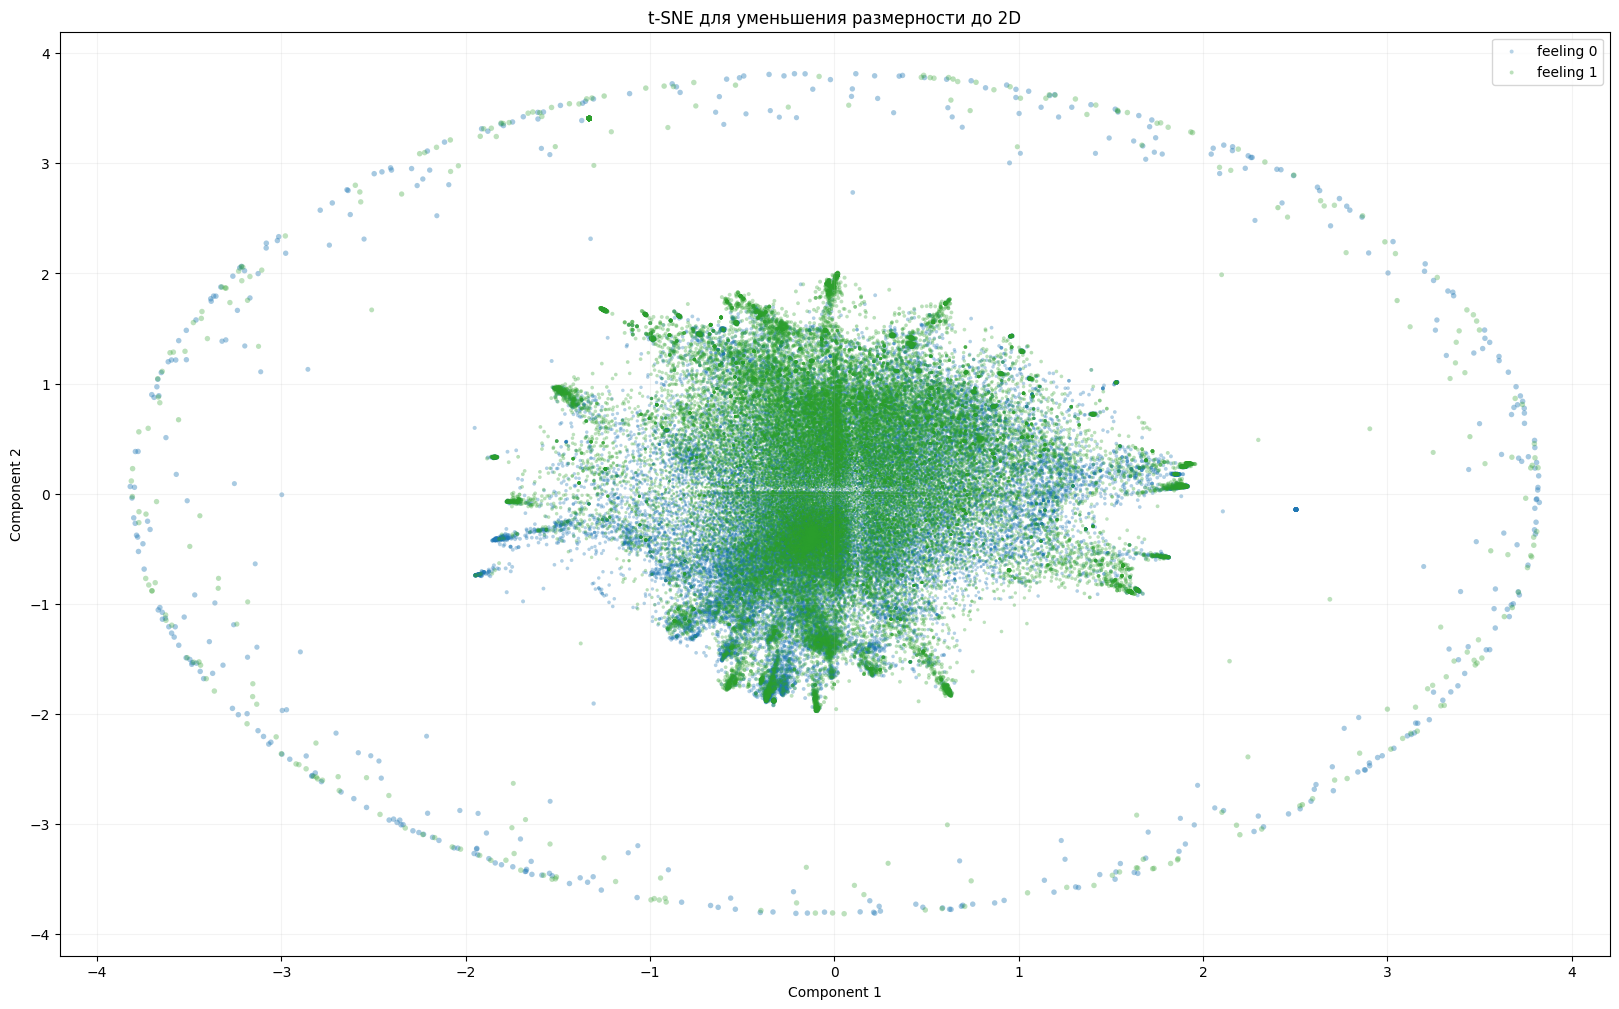

In [295]:
%matplotlib inline

tsne_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])
colors_lst = np.where(df.feeling == 0, 'purple', 'yellow')

fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(
    tsne_df.loc[df.feeling == 0, 'Component 1'].values, 
    tsne_df.loc[df.feeling == 0, 'Component 2'].values, 
    c='tab:blue', 
    label='feeling 0', 
    s=.5 + np.linalg.norm(tsne_df.loc[df.feeling == 0], axis=1) * 4,
    alpha=0.3 + np.linalg.norm(tsne_df.loc[df.feeling == 0], axis=1) / 40,
    edgecolors='none'
)
ax.scatter(
    tsne_df.loc[df.feeling == 1, 'Component 1'].values, 
    tsne_df.loc[df.feeling == 1, 'Component 2'].values, 
    c='tab:green', 
    label='feeling 1', 
    s=.5 + np.linalg.norm(tsne_df.loc[df.feeling == 1], axis=1) * 4,
    alpha=0.3 + np.linalg.norm(tsne_df.loc[df.feeling == 0], axis=1) / 40,
    edgecolors='none'
)
ax.legend()
ax.grid(True, alpha=0.15)

plt.title('t-SNE для уменьшения размерности до 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# **6) Облака слов**

### **6.1. Облака слов для каждой тональности**

In [ ]:
from wordcloud import WordCloud

In [ ]:
df['lemmatized_str'] = df['lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
df['lemmatized_str']

,lemmatized_str
0,starting back work today look like itll rainin...
1,sugar level dropping munchies setting luckily ...
2,yeah great summer break
3,hannah montana good going read twilight
4,aww fun last week
...,...
149980,great night tab im missing chad going bed
149981,night work church morning
149982,book terrible im used reading make belief teen...
149983,update miss update guy


In [ ]:
positive_tweets = ' '.join(df[df['feeling'] == 1]['lemmatized_str'])
negative_tweets = ' '.join(df[df['feeling'] == 0]['lemmatized_str'])

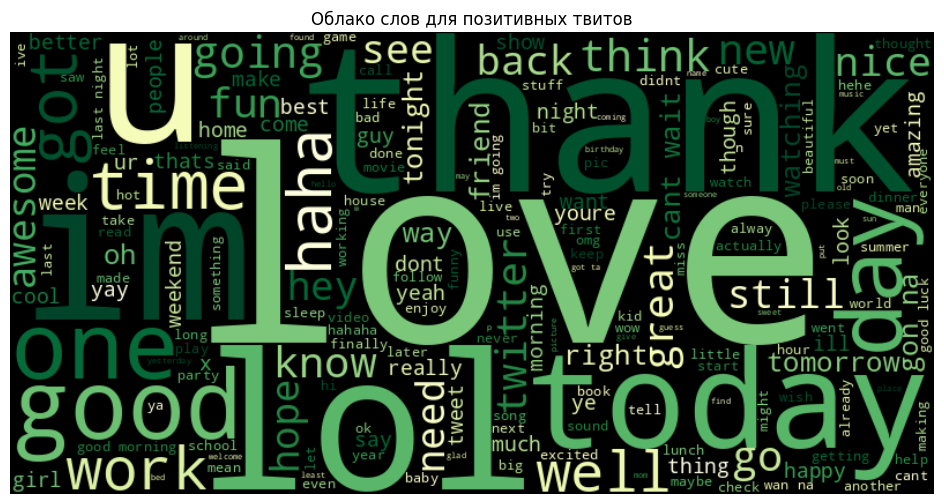

In [ ]:
wordcloud_pos = WordCloud(width=800, height=400, colormap='YlGn', background_color='black').generate(positive_tweets)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для позитивных твитов')
plt.show()

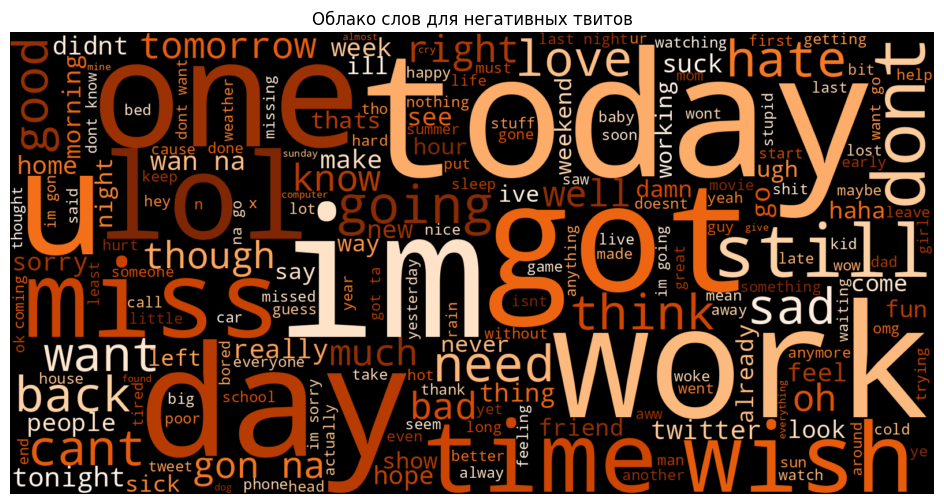

In [ ]:
wordcloud_neg = WordCloud(width=1600, height=800, colormap='Oranges_r', background_color='black').generate(negative_tweets)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для негативных твитов')
plt.show()

### **6.2. Топ-20 самых частых слов для каждой тональности**

In [ ]:
dict_pos = {} #Словарь: 'слова': кол-во (позитив)
for tweet in df[df['feeling'] == 1]['lemmatized_str']:
    words_pos = tweet.split()
    for word in words_pos:
        if word in dict_pos:
            dict_pos[word] += 1
        else:
            dict_pos[word] = 1

In [ ]:
dict_neg = {} #Словарь: 'слова': кол-во (негатив)
for tweet in df[df['feeling'] == 0]['lemmatized_str']:
    words_neg = tweet.split()
    for word in words_neg:
        if word in dict_neg:
            dict_neg[word] += 1
        else:
            dict_neg[word] = 1

In [ ]:
df_dict_pos = pd.DataFrame(list(dict_pos.items()), columns=['word', 'frequency']).nlargest(20, 'frequency')
df_dict_neg = pd.DataFrame(list(dict_neg.items()), columns=['word', 'frequency']).nlargest(20, 'frequency')

In [ ]:
df_dict_pos

,word,frequency
38,im,7200
16,good,5699
48,day,5101
250,love,4655
249,get,3585
190,like,3569
84,u,3567
129,thanks,3307
68,lol,3220
72,time,3151


In [ ]:
df_dict_neg

,word,frequency
35,im,9762
10,day,4862
95,go,4546
28,get,4441
175,cant,4207
134,dont,4187
2,work,4130
5,like,3845
51,got,3549
3,today,3518


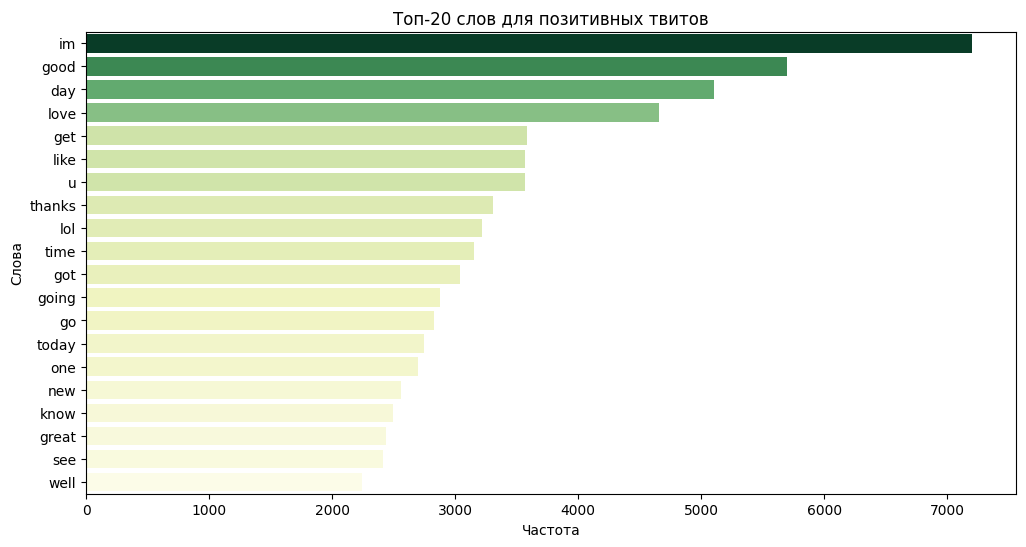

In [ ]:
#Топ-20 слов в позитивных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', hue='frequency', data=df_dict_pos, palette='YlGn', legend=False)
plt.title('Топ-20 слов для позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Cлова')
plt.show()

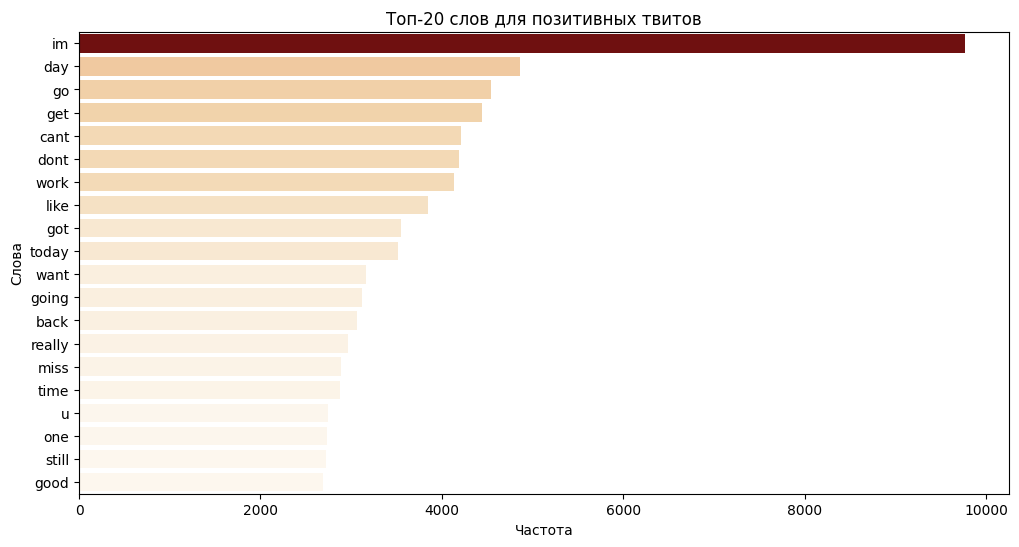

In [ ]:
#Топ-20 слов в негативных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', hue='frequency', data=df_dict_neg, palette='OrRd', legend=False)
plt.title('Топ-20 слов для позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Cлова')
plt.show()

# **7) Анализ n-грамм**

В главе 7 исследуются би- и триграммы для твитов позитивной и негативной тональностей.

### **7.1. Биграммы для позитивных твитов**

In [ ]:
bigrams_pos = []
for tweet in df[df['feeling'] == 1]['lemmatized_str']:
    words = tweet.split()
    for bigram in ngrams(words, 2):
        bigrams_pos.append(' '.join(bigram)) #Биграмма ---> Строка

In [ ]:
#Подсчёт частоты биграмм
dict_bigram_pos = {}
for bigram in bigrams_pos:
    if bigram in dict_bigram_pos:
        dict_bigram_pos[bigram] += 1
    else:
        dict_bigram_pos[bigram] = 1

In [ ]:
df_bigram_pos = pd.DataFrame(list(dict_bigram_pos.items()), columns=['bigram', 'frequency']).nlargest(20, 'frequency')

In [ ]:
df_bigram_pos

,bigram,frequency
524,cant wait,1005
1618,gon na,980
193,good morning,663
97,im going,456
2221,last night,452
130,wan na,425
1582,good luck,396
2082,got ta,338
1124,good night,325
2434,looking forward,313


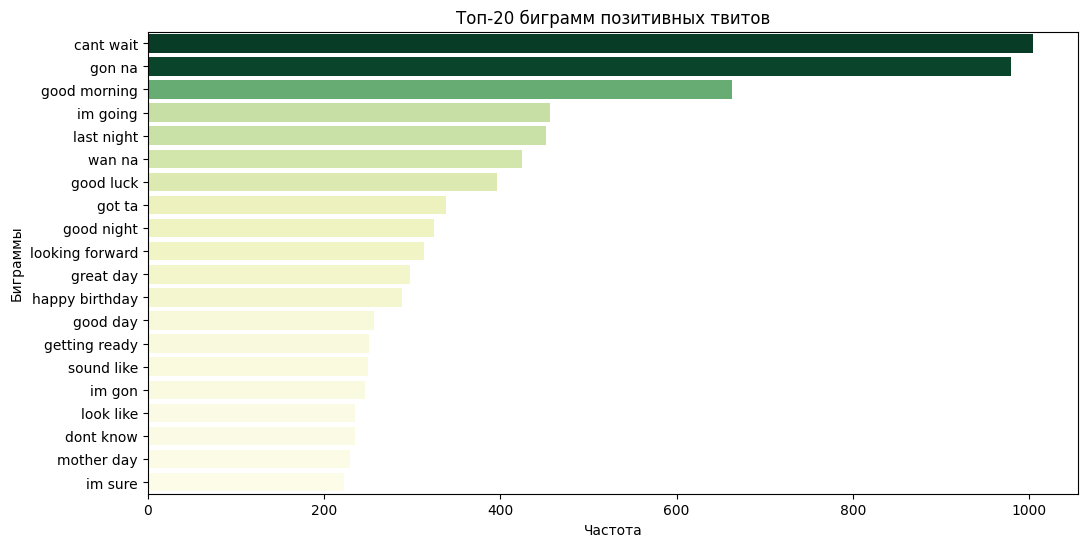

In [ ]:
#Топ-20 биграмм в позитивных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='bigram', hue='frequency', data=df_bigram_pos, palette='YlGn', legend=False)
plt.title('Топ-20 биграмм позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Биграммы')
plt.show()

### **7.2. Триграммы для позитивных твиттов**

In [ ]:
#Подсчёт триграмм для позитивных твитов
trigrams_pos = []
for tweet in df[df['feeling'] == 1]['lemmatized_str']:
    words = tweet.split()
    for trigram in ngrams(words, 3):
        trigrams_pos.append(' '.join(trigram))

In [ ]:
dict_trigram_pos = {}
for trigram in trigrams_pos:
    if trigram in dict_trigram_pos:
        dict_trigram_pos[trigram] += 1
    else:
        dict_trigram_pos[trigram] = 1

In [ ]:
df_trigram_pos = pd.DataFrame(list(dict_trigram_pos.items()), columns=['trigram', 'frequency']).nlargest(20, 'frequency')

In [ ]:
df_trigram_pos

,trigram,frequency
1393,im gon na,245
938,cant wait see,202
8290,happy mother day,151
6690,get follower day,128
6691,follower day using,128
6692,day using add,128
6693,using add everyone,128
6694,add everyone train,128
6695,everyone train pay,128
6696,train pay vip,128


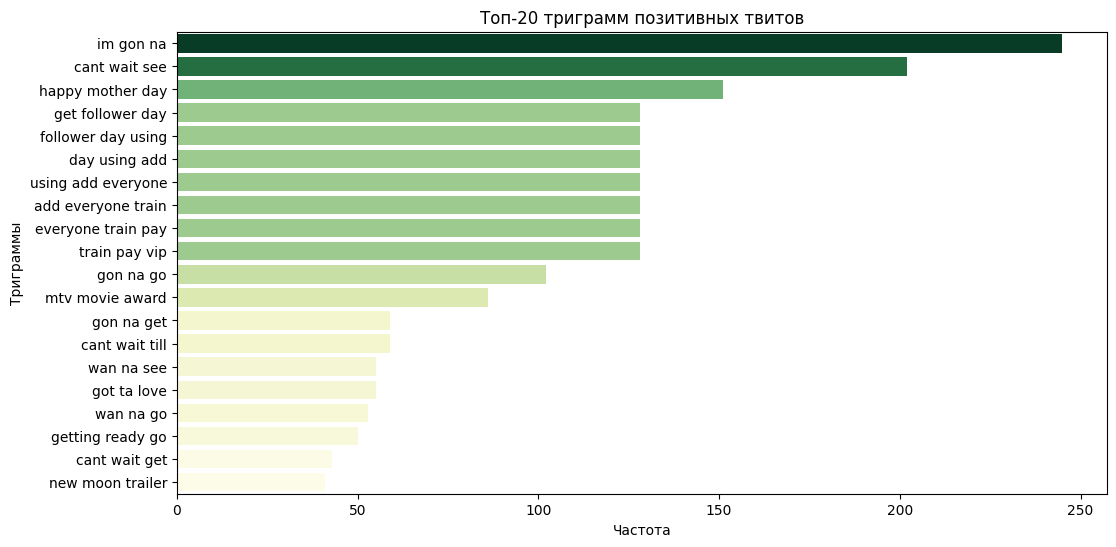

In [ ]:
#Топ-20 триграмм в позитивных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='trigram', hue='frequency', data=df_trigram_pos, palette='YlGn', legend=False)
plt.title('Топ-20 триграмм позитивных твитов')
plt.xlabel('Частота')
plt.ylabel('Триграммы')
plt.show()

### **7.3. Биграммы для негативных твитов**

In [ ]:
bigrams_neg = []
for tweet in df[df['feeling'] == 0]['lemmatized_str']:
    words = tweet.split()
    for bigram in ngrams(words, 2):
        bigrams_neg.append(' '.join(bigram)) #Биграмма ---> Строка

In [ ]:
#Подсчёт частоты биграмм
dict_bigram_neg = {}
for bigram in bigrams_neg:
    if bigram in dict_bigram_neg:
        dict_bigram_neg[bigram] += 1
    else:
        dict_bigram_neg[bigram] = 1

In [ ]:
df_bigram_neg = pd.DataFrame(list(dict_bigram_neg.items()), columns=['bigram', 'frequency']).nlargest(20, 'frequency')

In [ ]:
df_bigram_neg

,bigram,frequency
126,gon na,1207
784,wan na,1071
461,last night,690
966,feel like,614
200,im sorry,559
1283,wish could,549
139,dont know,540
67,im going,499
5147,dont want,462
50,got ta,455


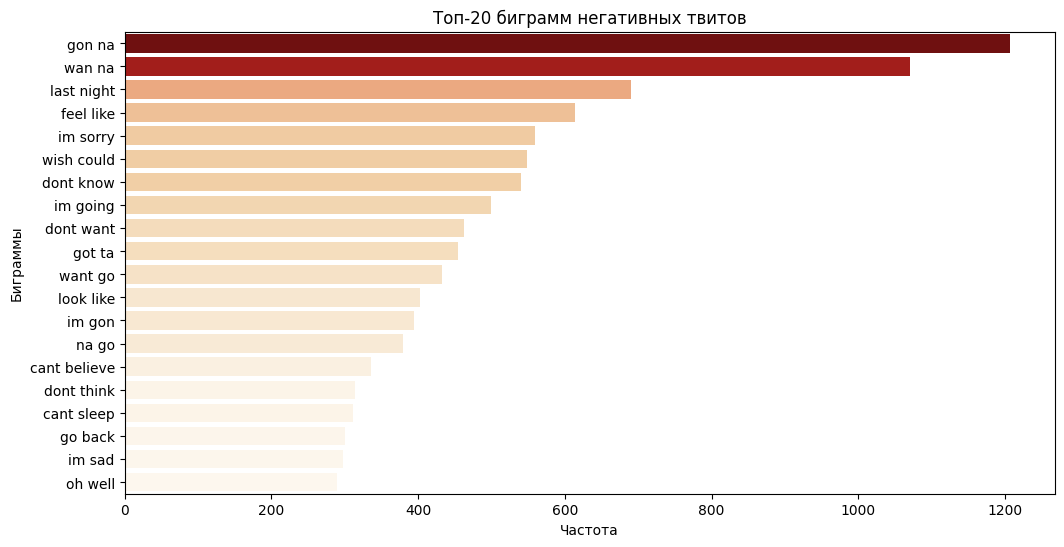

In [ ]:
#Топ-20 биграмм в негативных твитах
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='bigram', hue='frequency', data=df_bigram_neg, palette='OrRd', legend=False)
plt.title('Топ-20 биграмм негативных твитов')
plt.xlabel('Частота')
plt.ylabel('Биграммы')
plt.show()

### **7.4. Триграммы для негативных твитов**

In [ ]:
trigrams_neg = []
for tweet in df[df['feeling'] == 0]['lemmatized_str']:
    words = tweet.split()
    for trigram in ngrams(words, 3):
        trigrams_neg.append(' '.join(trigram))

In [ ]:
dict_trigram_neg = {}
for trigram in trigrams_neg:
    if trigram in dict_trigram_neg:
        dict_trigram_neg[trigram] += 1
    else:
        dict_trigram_neg[trigram] = 1

In [ ]:
df_trigram_neg = pd.DataFrame(list(dict_trigram_neg.items()), columns=['trigram', 'frequency']).nlargest(20, 'frequency')

In [ ]:
df_trigram_neg

,trigram,frequency
813,im gon na,389
664,wan na go,297
2744,dont wan na,235
3306,gon na miss,150
4621,dont want go,90
1400,wish could go,84
11211,gon na go,82
3348,hope feel better,80
5245,wan na see,80
12391,dont feel good,72


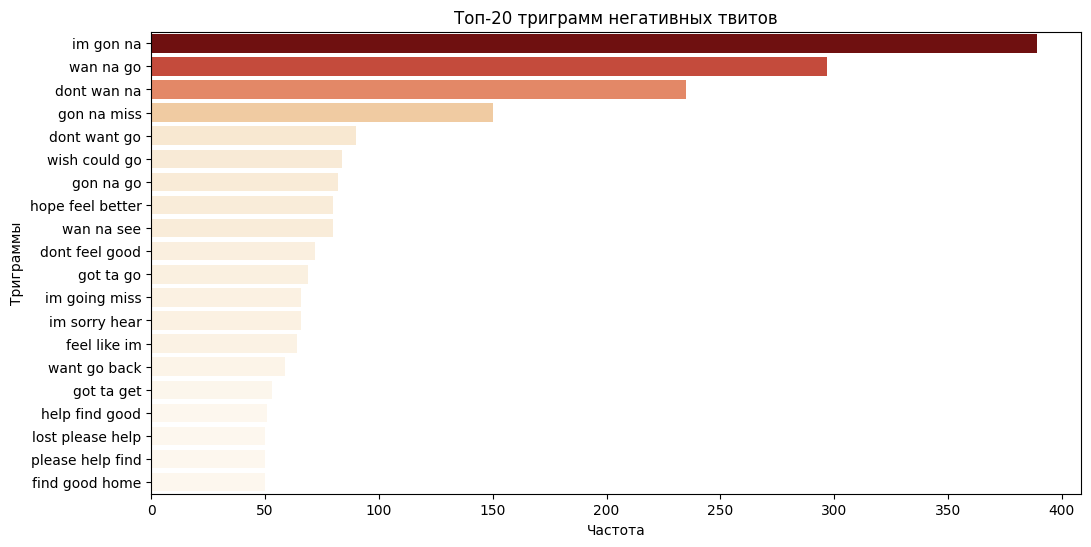

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='trigram', hue='frequency', data=df_trigram_neg, palette='OrRd', legend=False)
plt.title('Топ-20 триграмм негативных твитов')
plt.xlabel('Частота')
plt.ylabel('Триграммы')
plt.show()

Самые популярные биграммы в **позитивных твитах** -- *cant wait*, *gon na*, *good morning*, *im going* и *last night*. К наиболее частым позитивным триграммам относятся *im gon na*, *cant wait see*, *happy mother day*, *get follower day* и *follower day using*.

В **негативных твитах** распределение би- и триграмм несколько отличается от твитов положительной тональности:
1.  самые частые биграммы -- *gon na*, *wan na*, *last night*, *feel like* и *im sorry*;
2.  самые частые триграммы -- *im gon na*, *wan na go*, *dont wan na*, *gon na miss* и *dont want go*.

**Совпадающие биграммы** (но частота в зависимости от тональности различается): gon na и last night.

**Совпадающие триграммы** (частота в зависимости от тональности не меняется): im gon na.

# **(OLD BUT GOLD) Анализ пунктуации: восклицательный и вопросительный знаки**

В этой главе исследуется частота использования восклицательного и вопросительного знаков в твитах положительной и отрицательной тональностей.

In [ ]:
df.head()

,feeling,tweet,word_count,char_count,email_count,nickname_count,url_count,html_count,hashtag_count,cleaned_tweet,word_count_cleaned,char_count_cleaned,tokens,cleaned_tokens,lemmatized,pos_tags,lemmatized_str
0,0,starting back at work today looks like it'l...,16,87,0,0,0,0,0,starting back at work today looks like itll be...,16,82,"[starting, back, at, work, today, looks, like,...","[starting, back, work, today, looks, like, itl...","[starting, back, work, today, look, like, itll...","[(starting, VBG), (back, RP), (work, NN), (tod...",starting back work today look like itll rainin...
1,1,sugar levels dropping... munchies setting in. ...,16,103,0,0,0,0,0,sugar levels dropping munchies setting in luck...,16,98,"[sugar, levels, dropping, munchies, setting, i...","[sugar, levels, dropping, munchies, setting, l...","[sugar, level, dropping, munchies, setting, lu...","[(sugar, NN), (level, NN), (dropping, VBG), (m...",sugar level dropping munchies setting luckily ...
2,1,yeah!!! have a great summer break!,7,46,0,1,0,0,0,yeah have a great summer break,6,30,"[yeah, have, a, great, summer, break]","[yeah, great, summer, break]","[yeah, great, summer, break]","[(yeah, RB), (great, JJ), (summer, NN), (break...",yeah great summer break
3,1,hannah montana was very good. now going to re...,10,59,0,0,0,0,0,hannah montana was very good now going to read...,10,55,"[hannah, montana, was, very, good, now, going,...","[hannah, montana, good, going, read, twilight]","[hannah, montana, good, going, read, twilight]","[(hannah, NN), (montana, NN), (good, JJ), (goi...",hannah montana good going read twilight
4,1,"aww, have fun! i just had my 3d last week!",11,53,0,1,0,0,0,aww have fun i just had my d last week,10,38,"[aww, have, fun, i, just, had, my, d, last, week]","[aww, fun, last, week]","[aww, fun, last, week]","[(aww, NN), (fun, NN), (last, JJ), (week, NN)]",aww fun last week


In [ ]:
df['exclamation_count'] = df['tweet'].str.count('!')

In [ ]:
df['question_count'] = df['tweet'].str.count(r'\?')

In [ ]:
#Количество восклицательных и вопросительных знаков для каждой тональности
summary = df.groupby('feeling').agg({
    'exclamation_count': 'sum',
    'question_count': 'sum'
}).reset_index()

In [ ]:
summary

,feeling,exclamation_count,question_count
0,0,36339,11026
1,1,50485,11993


In [ ]:
summary['feeling'] = summary['feeling'].map({1: 'Позитивная', 0: 'Негативная'})

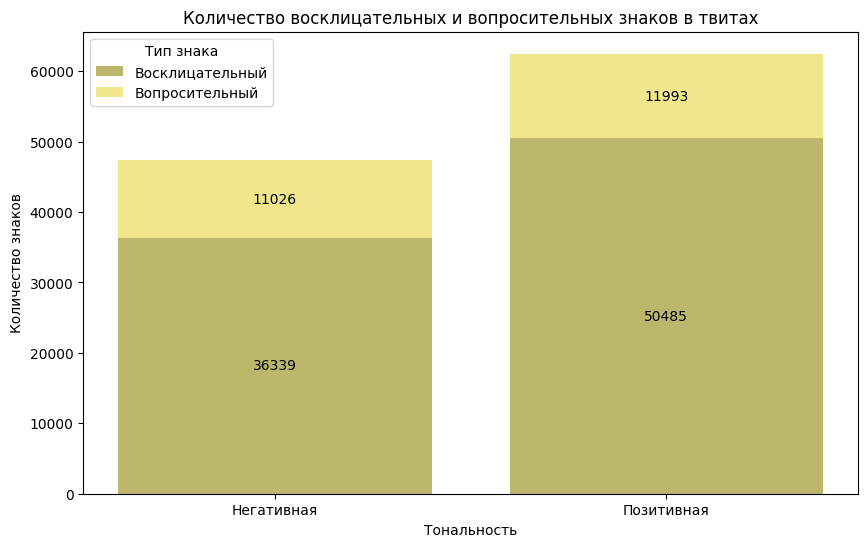

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(summary['feeling'], summary['exclamation_count'],
        label='Восклицательный', color='darkkhaki')

plt.bar(summary['feeling'], summary['question_count'],
        label='Вопросительный', bottom=summary['exclamation_count'],
        color='khaki')

for i, count in enumerate(summary['exclamation_count']):
    plt.text(i, count / 2, str(count), ha='center', va='center', color='black')

for i, count in enumerate(summary['question_count']):
    plt.text(i, summary['exclamation_count'].iloc[i] + count / 2, str(count), ha='center', va='center', color='black')

plt.title('Количество восклицательных и вопросительных знаков в твитах')
plt.ylabel('Количество знаков')
plt.xlabel('Тональность')
plt.legend(title='Тип знака')
plt.show()

Заметим: в позитивных твитах восклицательный и воспросительный знаки используются чаще, чем в негативных твитах (в 1,39 и 1,09 раза соответствнно). Следовательно, в твитах положительной тональности люди более склонны к эмоциональности (с точки зрения использования количества двух указанных знаков препинания).